



\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     ML Prognosis model for SSA CVD      # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
  

In [ ]:
!pip  install openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Load all xls input

In [ ]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

# Loading yearly datasets inputs
df_2015 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/AI_final_year_project/ENQ2015.xlsx')
df_2016 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/AI_final_year_project/ENQ2016.xlsx')
df_2017 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/AI_final_year_project/ENQ2017.xlsx')
df_2019 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/AI_final_year_project/ENQ2019.xlsx')

# Loading the individuals' status xls
df_results = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/AI_final_year_project/Evenements_a_predir.xlsx')
df_results.at[112,'Date'] = np.nan

# Rename Id column for futur merge of datasets based on individuals' Id
df_2015.rename(columns = {"id_sujet_15":'Id'}, inplace = True)
df_2016.rename(columns = {"id_sujet_16":'Id'}, inplace = True)
df_2017.rename(columns = {"id_sujet_17":'Id'}, inplace = True)
df_2019.rename(columns = {"id_sujet_19":'Id'}, inplace = True)
df_2019.rename(columns = {'_submission_time':'inclusion_19'}, inplace = True)

# Change types of the colums
df_2019 = df_2019.astype({"Id" : int})
df_2017 = df_2017.astype({"Id" : int})
df_2017 = df_2017.astype({"age_17" : int})

Convert and Recompute some data

In [ ]:
df_2015['poids_15']

0      54.0
1      66.0
2      50.0
3      48.0
4      68.0
       ... 
907    64.0
908    28.0
909    44.0
910    53.3
911    40.0
Name: poids_15, Length: 912, dtype: float64

In [ ]:

import datetime 
from dateutil.relativedelta import relativedelta

# Convert date string into date format for report status
df_results['Date'] = df_results.apply( lambda row: 
                                      datetime.datetime.strptime(row['Date'],'%d/%m/%Y') 
                                      if not isinstance(row['Date'], datetime.date) and not np.isnan(row['Date']) and not(row['Date'] is pd.NaT) 
                                      else row['Date'] , axis=1)

df_2015['imc_15'] = df_2015['poids_15']/((df_2015['tail_15']/100)**2)
#df_2015['imc'] = df_2015.apply( lambda row: row.poids_15/ (row.tail_15/100)^2)
# Convert date string into date format for year 2016
df_2016['ddn_16'] = df_2016.apply( lambda row: datetime.datetime.strptime(row['ddn_16'],'%d/%m/%Y') if not isinstance(row['ddn_16'], datetime.date) else row['ddn_16'] , axis=1)
df_2016['inclusion_16'] = df_2016.apply( lambda row: datetime.datetime.strptime(row['inclusion_16'],'%d/%m/%Y') if not isinstance(row['inclusion_16'], datetime.date) else row['inclusion_16'] , axis=1)

df_2016['imc_16'] = df_2016['poids_16']/((df_2016['tail_16']/100)**2)

# Recompute some parameters in year 2016 based other xls 
df_2016['age_16'] = df_2016.apply( lambda row: relativedelta(row['inclusion_16'],row['ddn_16']).years if np.isnan(row['age_16']) else row['age_16'], axis=1)
for i in range(2,4):
  for j in ['s', 'd']:
    for k in ['g', 'd']:
      df_2016["pa"+j+"_b"+k+str(i)+'_16'] = df_2016.apply( lambda row: 
                                                          row["pa"+j+"_b"+k+"1_16"] if (not np.isnan(row["pa"+j+"_b"+k+"1_16"])) 
                                                          else row["pa"+j+"_b"+k+str(i)+'_16'] , axis=1)
for i in range(1,4):
  for k in ['g', 'd']:
    df_2016["poul"+k+str(i)+"_16"] = df_2016.apply( lambda row: 
                                                   df_2015.loc[ df_2015.Id == row['Id'], "poul"+k+str(i)+"_15"].values[0] if (row['Id'] in df_2015.Id.values and np.isnan(row["poul"+k+str(i)+"_16"])) else df_2017.loc[ df_2017.Id == row['Id'], "poul"+k+str(i)+"_17"].values[0]  if (row['Id'] in df_2017.Id.values and np.isnan(row["poul"+k+str(i)+"_16"])) else row["poul"+k+str(i)+"_16"], axis=1)

df_2016["omi_godet_16"] = df_2016.apply( lambda row: df_2017.loc[ df_2017.Id == row['Id'], "omi_godet_17"].values[0] if (row['Id'] in df_2017.Id.values and np.isnan(row["omi_godet_16"])) else df_2015.loc[ df_2015.Id == row['Id'], "omi_godet_15"].values[0]  if (row['Id'] in df_2015.Id.values and np.isnan(row["omi_godet_16"])) else row["omi_godet_16"], axis=1)


df_2017['imc_17'] = df_2017['poids_17']/((df_2017['tail_17']/100)**2)

# Convert date string into date format for year 2019
df_2019['ddn_19'] = df_2019.apply( lambda row: datetime.datetime.strptime(row['ddn_19'],'%Y-%m-%d') if "-" in str(row['ddn_19']) and not(":" in str(row['ddn_19'])) else row['ddn_19'] , axis=1)
df_2019['inclusion_19'] = df_2019.apply( lambda row: datetime.datetime.strptime(row['inclusion_19'],'%Y-%m-%dT%H:%M:%S') if not isinstance(row['inclusion_19'], datetime.date) else row['inclusion_19'] , axis=1)

# Recompute some parameters in year 2016 based other xls 
df_2019['age_19'] = df_2019.apply( lambda row: df_2017.loc[ df_2017.Id == row['Id'], 'age_17'].values[0] + 2 if row['Id'] in df_2017.Id.values else relativedelta(row['inclusion_19'],row['ddn_19']).years if not(row['ddn_19'] is pd.NaT) and not(row['inclusion_19'] is pd.NaT) else np.nan, axis=1)

df_2019['imc_19'] = df_2019['poids_19']/((df_2019['tail_19']/100)**2)

# Encoding of categorical string
df_2019['dysp_repos_19'] = df_2019['dysp_repos_19'].map({'oui': 1, 'non': 0})
df_2019['amp_mi_19'] = df_2019['amp_mi_19'].map({'oui': 1, 'non': 0})
df_2019['amp_mi_sg_19'] = df_2019['amp_mi_sg_19'].map({'oui': 1, 'non': 0})
df_2019['omi_19'] = df_2019['omi_19'].map({'oui': 1, 'non': 0})
df_2019['omi_godet_19'] = df_2019['omi_godet_19'].map({'oui': 1, 'non': 0})



The Idea is to do make an Evolution Rate Merging of the datasets.

For that we have to select Individuals who has at least 2 samples.

But we have to make sure that those individuals are not duplicated while doing a merge.

Therefore the solution is to make first a temporary merge with 2 yearly datasets with only selected individuals before doing a final merge of all datasets.

In [ ]:
import collections 

# Create a dictionnary of individuals for each year
w_15 = collections.Counter(df_2015.Id.values)
w_16 = collections.Counter(df_2016.Id.values)
w_17 = collections.Counter(df_2017.Id.values)
w_19 = collections.Counter(df_2019.Id.values)

#merge_w = w_15+w_16+w_17+w_19
#occ_1 = {k:v for k,v in merge_w.items() if v == 1}

# List individuals present in 2019 and 2015
l_19_15 = (w_15.keys()) & set(w_19.keys())
# List individuals present in 2017 and 2016 exclusding previous list
l_17_15 = (set(w_15.keys()) & set(w_17.keys())) - set(l_19_15)
# List individuals present in 2019 and 2016 exclusding previous list
l_19_16 = (set(w_19.keys()) & set(w_16.keys())) - set(l_19_15) - set(l_17_15)
# List individuals present in 2019 and 2017 exclusding previous list
l_19_17 = (set(w_19.keys()) & set(w_17.keys())) - set(l_19_15) - set(l_17_15) - set(l_19_16)
# List individuals present in 2016 and 2017 exclusding previous list
l_17_16 = (set(w_16.keys()) & set(w_17.keys())) - set(l_19_15) - set(l_17_15) - set(l_19_16) - set(l_19_17)
# List individuals present in 2015 and 2016 exclusding previous list
l_16_15 = (set(w_16.keys()) & set(w_15.keys())) - set(l_19_15) - set(l_17_15) - set(l_19_16) - set(l_19_17) - set(l_17_16)

# There are 6 temporary datasets merge


In [ ]:
# Temporay merge between year 2019 and 2015
df_merge_19_15 = pd.merge(df_2015, df_2019, how='inner', left_on='Id', right_on='Id')
df_merge_19_15 = df_merge_19_15[df_merge_19_15['Id'].isin(l_19_15)]

# Drop all the missing parameters (parameters not present in both datasets)  
df_merge_19_15 = df_merge_19_15.drop(['Champ169', 'siege_omi_15', 'Typ_rep_19', 'nb_gross_19',
       'HTA_gross_19', 'medoc_HTA_gross_19', 'date_fin_gross1st_19',
       'date_fin_gross_dern_19', 'lieu_accouch_derng', 'piece_id_19', 'tour_hanch_19', 'amp_mi_sg_15', 'amp_mi_sg_19', 'creat_19', '_id', '_uuid'], axis=1)

# Merge the temporary datasets with the status report xls dataset
df_merge_19_15 = pd.merge(df_merge_19_15, df_results[['Id', "Date", "Type d'évènement", 'Age']], how='left')
df_merge_19_15['Date'] = df_merge_19_15.apply( lambda row: datetime.datetime.strptime(row['Date'],'%d/%m/%Y') if not isinstance(row['Date'], datetime.date) and not np.isnan(row['Date']) and not(row['Date'] is pd.NaT) else row['Date'] , axis=1)
df_merge_19_15.rename(columns = {"Type d'évènement":'event'}, inplace = True)

# Compute missing parameter
df_merge_19_15["sexe"] = df_merge_19_15.apply( lambda row: row['sexe_15'] if (not np.isnan(row['sexe_15'])) else row['sexe_19'] , axis=1)
df_merge_19_15 = df_merge_19_15.drop(['sexe_15', 'sexe_19'], axis=1)

# Encode the status of the individual
df_merge_19_15["event"] = df_merge_19_15["event"].map({'deces': 1, 'ICD': 2, 'AVC': 3, np.nan: 0})

# Compute lifespan of the individual
df_merge_19_15['lifespan'] = df_merge_19_15.apply( lambda row: relativedelta(row['Date'],row['inclusion_19']).years * 12 + relativedelta(row['Date'],row['inclusion_19']).months if not(row['Date'] is pd.NaT) and not(row['inclusion_19'] is pd.NaT) else 999, axis=1)

# Compute relative time
df_merge_19_15['time_diff'] = df_merge_19_15.apply( lambda row: relativedelta(row['inclusion_19'],row['inclusion_15']).years * 12 + relativedelta(row['inclusion_19'],row['inclusion_15']).months if not(row['inclusion_19'] is pd.NaT) and not(row['inclusion_15'] is pd.NaT) else 12*4, axis=1)

# List all the individuals from the merged datasets
rows = list(df_merge_19_15.Id.values)

# List all parameters which evolution rates need to be computed
cols = list(df_merge_19_15.columns.values)
cols.pop(cols.index('Id'))
cols.pop(cols.index('ddn_15'))
cols.pop(cols.index('ddn_19'))
cols.pop(cols.index('tail_15'))
cols.pop(cols.index('tail_19'))
cols.pop(cols.index('poids_15'))
cols.pop(cols.index('poids_19'))
cols.pop(cols.index('Date'))
cols.pop(cols.index('Age'))
cols.pop(cols.index('pas_bg1_15'))
cols.pop(cols.index('pad_bg1_15'))
cols.pop(cols.index('poulg1_15'))
cols.pop(cols.index('pas_bg2_15'))
cols.pop(cols.index('pad_bg2_15'))
cols.pop(cols.index('poulg2_15'))
cols.pop(cols.index('pas_bd1_15'))
cols.pop(cols.index('pad_bd2_15'))
cols.pop(cols.index('pould1_15'))
cols.pop(cols.index('pas_bd2_15'))
cols.pop(cols.index('pould2_15'))
cols.pop(cols.index('pas_bg1_19'))
cols.pop(cols.index('pad_bg1_19'))
cols.pop(cols.index('poulg1_19'))
cols.pop(cols.index('pas_bg2_19'))
cols.pop(cols.index('pad_bg2_19'))
cols.pop(cols.index('poulg2_19'))
cols.pop(cols.index('pas_bd1_19'))
cols.pop(cols.index('pad_bd2_19'))
cols.pop(cols.index('pould1_19'))
cols.pop(cols.index('pas_bd2_19'))
cols.pop(cols.index('pould2_19'))
cols.pop(cols.index('event'))
cols.pop(cols.index("lifespan"))
cols = cols+['event','lifespan']
df_merge_19_15 = df_merge_19_15[cols]

# Convert all value to numerical
for col in df_merge_19_15.columns:
  df_merge_19_15[col] = pd.to_numeric(df_merge_19_15[col], errors='coerce')



In [ ]:
from sklearn.impute import KNNImputer

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_merge_19_15_filled = imputer.fit_transform(df_merge_19_15)

# Recreate a Dataframe from Numpy array
df_merge_19_15_filled = pd.DataFrame(data=df_merge_19_15_filled, index=rows, columns=cols)


In [ ]:
# List of all the column which needs to be computed for evolution rate
# and rename them with a consistent name
modif_col_val = ['poids',
       'tail', 'tour_tail', 'pas_bg3', 'pad_bg3',
       'poulg3', 'pas_bd3', 'pad_bd3', 'pould3',
       'dysp_repos', 'amp_mi', 'omi',
       'omi_godet', 'gly']

modif_col_val = ['imc',
       'tour_tail', 'pas_bg3', 'pad_bg3',
       'poulg3', 'pas_bd3', 'pad_bd3', 'pould3',
       'dysp_repos', 'amp_mi', 'omi',
       'omi_godet', 'gly']

# Column which does not need to be computed for evolution rate
keep_col_val = ['age']

In [ ]:
# Compute the evolution rate for each dedicated column
for col in modif_col_val:
  df_merge_19_15_filled[col] = df_merge_19_15_filled.apply( lambda row: ((int(row[col + '_19']) - int(row[col + '_15']))/row['time_diff'])/int(row[col + '_15']) , axis=1)

# Select the value of parameter which does not need evolution rate computation
for col in keep_col_val:
  df_merge_19_15_filled[col] = df_merge_19_15_filled.apply( lambda row: max(row[col + '_19'], row[col + '_15']), axis=1)

# Get the final temporary merged datasets
df_merge_19_15_final = df_merge_19_15_filled[keep_col_val+modif_col_val+['event','lifespan']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_merge_19_15_final.head()

,age,poids,tail,tour_tail,pas_bg3,pad_bg3,poulg3,pas_bd3,pad_bd3,pould3,dysp_repos,amp_mi,omi,omi_godet,gly,event,lifespan
10010101,39.0,0.001182,-0.000133,0.004255,-0.000443,0.002920,0.002026,-0.001403,0.001252,0.001637,NaN,NaN,NaN,-0.021277,inf,0.0,999.0
10010102,47.0,0.003868,-0.000250,0.000239,-0.002231,-0.004203,-0.006216,-0.000185,0.005404,-0.001850,NaN,NaN,NaN,-0.021277,inf,0.0,999.0
10010201,53.0,-0.002128,-0.000143,0.000000,-0.001824,0.001395,-0.000665,-0.001193,0.003246,-0.001954,NaN,NaN,NaN,-0.021277,inf,0.0,999.0
10060101,92.0,0.000443,-0.000268,0.003163,0.000000,0.009635,-0.003203,0.002081,0.009787,-0.002974,NaN,NaN,NaN,-0.021277,inf,0.0,999.0
10060401,71.0,-0.002503,0.000734,0.000000,-0.001478,0.004380,-0.001732,0.002461,0.004728,-0.003347,NaN,NaN,NaN,-0.021277,1.914894,0.0,999.0


In [ ]:
df_merge_17_15 = pd.merge(df_2015, df_2017, how='inner', left_on='Id', right_on='Id')
df_merge_17_15 = df_merge_17_15[df_merge_17_15['Id'].isin(l_17_15)]

df_merge_17_15 = df_merge_17_15.drop(['Champ169', 'siege_omi_15', 'today_17', 'siege_omi_17', 'siege_omi_15', 'amp_mi_sg_15', 'amp_mi_sg_17'], axis=1)

df_merge_17_15 = pd.merge(df_merge_17_15, df_results[['Id', "Date", "Type d'évènement", 'Age']], how='left')
df_merge_17_15['Date'] = df_merge_17_15.apply( lambda row: datetime.datetime.strptime(row['Date'],'%d/%m/%Y') if not isinstance(row['Date'], datetime.date) and not np.isnan(row['Date']) and not(row['Date'] is pd.NaT) else row['Date'] , axis=1)
df_merge_17_15.rename(columns = {"Type d'évènement":'event'}, inplace = True)

df_merge_17_15["sexe"] = df_merge_17_15.apply( lambda row: row['sexe_15'] if (not np.isnan(row['sexe_15'])) else row['sexe_17'] , axis=1)
df_merge_17_15 = df_merge_17_15.drop(['sexe_15', 'sexe_17'], axis=1)

df_merge_17_15['time_diff'] = df_merge_17_15.apply( lambda row: relativedelta(row['inclusion_17'],row['inclusion_15']).years * 12 + relativedelta(row['inclusion_17'],row['inclusion_15']).months if not(row['inclusion_17'] is pd.NaT) and not(row['inclusion_15'] is pd.NaT) else 12*2, axis=1)

df_merge_17_15["event"] = df_merge_17_15["event"].map({'deces': 1, 'ICD': 2, 'AVC': 3, np.nan: 0})
df_merge_17_15['lifespan'] = df_merge_17_15.apply( lambda row: relativedelta(row['Date'],row['inclusion_17']).years * 12 + relativedelta(row['Date'],row['inclusion_17']).months if not(row['Date'] is pd.NaT) and not(row['inclusion_17'] is pd.NaT) else 999, axis=1)


cols = list(df_merge_17_15.columns.values)
rows = list(df_merge_17_15.Id.values)
cols.pop(cols.index('Id'))
cols.pop(cols.index('ddn_15'))
cols.pop(cols.index('ddn_17'))
cols.pop(cols.index('Date'))
cols.pop(cols.index('Age'))
cols.pop(cols.index('tail_15'))
cols.pop(cols.index('tail_17'))
cols.pop(cols.index('poids_15'))
cols.pop(cols.index('poids_17'))
cols.pop(cols.index('pas_bg1_15'))
cols.pop(cols.index('pad_bg1_15'))
cols.pop(cols.index('poulg1_15'))
cols.pop(cols.index('pas_bg2_15'))
cols.pop(cols.index('pad_bg2_15'))
cols.pop(cols.index('poulg2_15'))
cols.pop(cols.index('pas_bd1_15'))
cols.pop(cols.index('pad_bd2_15'))
cols.pop(cols.index('pould1_15'))
cols.pop(cols.index('pas_bd2_15'))
cols.pop(cols.index('pould2_15'))
cols.pop(cols.index('pas_bg1_17'))
cols.pop(cols.index('pad_bg1_17'))
cols.pop(cols.index('poulg1_17'))
cols.pop(cols.index('pas_bg2_17'))
cols.pop(cols.index('pad_bg2_17'))
cols.pop(cols.index('poulg2_17'))
cols.pop(cols.index('pas_bd1_17'))
cols.pop(cols.index('pad_bd2_17'))
cols.pop(cols.index('pould1_17'))
cols.pop(cols.index('pas_bd2_17'))
cols.pop(cols.index('pould2_17'))
cols.pop(cols.index('event'))
cols.pop(cols.index("lifespan"))
cols = cols+['event','lifespan']
df_merge_17_15 = df_merge_17_15[cols]

for col in df_merge_17_15.columns:
  df_merge_17_15[col] = pd.to_numeric(df_merge_17_15[col], errors='coerce')

imputer = KNNImputer(n_neighbors=5)
df_merge_17_15_filled = imputer.fit_transform(df_merge_17_15)
df_merge_17_15_filled = pd.DataFrame(data=df_merge_17_15_filled, index=rows, columns=cols)

for col in modif_col_val:
  df_merge_17_15_filled[col] = df_merge_17_15_filled.apply( lambda row: ((int(row[col + '_17']) - int(row[col + '_15']))/row['time_diff'])/int(row[col + '_15']) , axis=1)

for col in keep_col_val:
  df_merge_17_15_filled[col] = df_merge_17_15_filled.apply( lambda row: max(row[col + '_17'], row[col + '_15']), axis=1)

df_merge_17_15_final = df_merge_17_15_filled[keep_col_val+modif_col_val+['event','lifespan']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
df_merge_19_16 = pd.merge(df_2016, df_2019, how='inner', left_on='Id', right_on='Id')
df_merge_19_16 = df_merge_19_16[df_merge_19_16['Id'].isin(l_19_16)]

df_merge_19_16 = df_merge_19_16.drop(['siege_omi_16', 'Typ_rep_19', 'nb_gross_19', 'today_16',
       'HTA_gross_19', 'medoc_HTA_gross_19', 'date_fin_gross1st_19',
       'date_fin_gross_dern_19', 'lieu_accouch_derng', 'piece_id_19', 'tour_hanch_19', 'amp_mi_sg_16', 'amp_mi_sg_19', 'creat_19', '_id', '_uuid'], axis=1)

df_merge_19_16 = pd.merge(df_merge_19_16, df_results[['Id', "Date", "Type d'évènement", 'Age']], how='left')
df_merge_19_16['Date'] = df_merge_19_16.apply( lambda row: datetime.datetime.strptime(row['Date'],'%d/%m/%Y') if not isinstance(row['Date'], datetime.date) and not np.isnan(row['Date']) and not(row['Date'] is pd.NaT) else row['Date'] , axis=1)
df_merge_19_16.rename(columns = {"Type d'évènement":'event'}, inplace = True)

df_merge_19_16["sexe"] = df_merge_19_16.apply( lambda row: row['sexe_16'] if (not np.isnan(row['sexe_16'])) else row['sexe_19'] , axis=1)
df_merge_19_16 = df_merge_19_16.drop(['sexe_16', 'sexe_19'], axis=1)

df_merge_19_16['time_diff'] = df_merge_19_16.apply( lambda row: relativedelta(row['inclusion_19'],row['inclusion_16']).years * 12 + relativedelta(row['inclusion_19'],row['inclusion_16']).months if not(row['inclusion_19'] is pd.NaT) and not(row['inclusion_16'] is pd.NaT) else 12*3, axis=1)

df_merge_19_16["event"] = df_merge_19_16["event"].map({'deces': 1, 'ICD': 2, 'AVC': 3, np.nan: 0})
df_merge_19_16['lifespan'] = df_merge_19_16.apply( lambda row: relativedelta(row['Date'],row['inclusion_19']).years * 12 + relativedelta(row['Date'],row['inclusion_19']).months if not(row['Date'] is pd.NaT) and not(row['inclusion_19'] is pd.NaT) else 999, axis=1)

cols = list(df_merge_19_16.columns.values)
rows = list(df_merge_19_16.Id.values)
cols.pop(cols.index('Id'))
cols.pop(cols.index('ddn_16'))
cols.pop(cols.index('ddn_19'))
cols.pop(cols.index('Date'))
cols.pop(cols.index('Age'))
cols.pop(cols.index('tail_16'))
cols.pop(cols.index('tail_19'))
cols.pop(cols.index('poids_16'))
cols.pop(cols.index('poids_19'))
cols.pop(cols.index('pas_bg1_16'))
cols.pop(cols.index('pad_bg1_16'))
cols.pop(cols.index('poulg1_16'))
cols.pop(cols.index('pas_bg2_16'))
cols.pop(cols.index('pad_bg2_16'))
cols.pop(cols.index('poulg2_16'))
cols.pop(cols.index('pas_bd1_16'))
cols.pop(cols.index('pad_bd2_16'))
cols.pop(cols.index('pould1_16'))
cols.pop(cols.index('pas_bd2_16'))
cols.pop(cols.index('pould2_16'))
cols.pop(cols.index('pas_bg1_19'))
cols.pop(cols.index('pad_bg1_19'))
cols.pop(cols.index('poulg1_19'))
cols.pop(cols.index('pas_bg2_19'))
cols.pop(cols.index('pad_bg2_19'))
cols.pop(cols.index('poulg2_19'))
cols.pop(cols.index('pas_bd1_19'))
cols.pop(cols.index('pad_bd2_19'))
cols.pop(cols.index('pould1_19'))
cols.pop(cols.index('pas_bd2_19'))
cols.pop(cols.index('pould2_19'))

cols.pop(cols.index('event'))
cols.pop(cols.index("lifespan"))
cols = cols+['event','lifespan']
df_merge_19_16 = df_merge_19_16[cols]

for col in df_merge_19_16.columns:
  df_merge_19_16[col] = pd.to_numeric(df_merge_19_16[col], errors='coerce')

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_merge_19_16_filled = imputer.fit_transform(df_merge_19_16)
df_merge_19_16_filled = pd.DataFrame(data=df_merge_19_16_filled, index=rows, columns=cols)

for col in modif_col_val:
  df_merge_19_16_filled[col] = df_merge_19_16_filled.apply( lambda row: ((int(row[col + '_19']) - int(row[col + '_16']))/row['time_diff'])/int(row[col + '_16']) , axis=1)

for col in keep_col_val:
  df_merge_19_16_filled[col] = df_merge_19_16_filled.apply( lambda row: max(row[col + '_19'], row[col + '_16']), axis=1)

df_merge_19_16_final = df_merge_19_16_filled[keep_col_val+modif_col_val+['event','lifespan']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:

df_merge_19_17 = pd.merge(df_2017, df_2019, how='inner', left_on='Id', right_on='Id')
df_merge_19_17 = df_merge_19_17[df_merge_19_17['Id'].isin(l_19_17)]

df_merge_19_17 = df_merge_19_17.drop(['siege_omi_17', 'Typ_rep_19', 'nb_gross_19', 'today_17',
       'HTA_gross_19', 'medoc_HTA_gross_19', 'date_fin_gross1st_19',
       'date_fin_gross_dern_19', 'lieu_accouch_derng', 'piece_id_19', 'tour_hanch_19', 'amp_mi_sg_17', 'amp_mi_sg_19', 'creat_19', '_id', '_uuid'], axis=1)

df_merge_19_17 = pd.merge(df_merge_19_17, df_results[['Id', "Date", "Type d'évènement", 'Age']], how='left')
df_merge_19_17['Date'] = df_merge_19_17.apply( lambda row: datetime.datetime.strptime(row['Date'],'%d/%m/%Y') if not isinstance(row['Date'], datetime.date) and not np.isnan(row['Date']) and not(row['Date'] is pd.NaT) else row['Date'] , axis=1)
df_merge_19_17.rename(columns = {"Type d'évènement":'event'}, inplace = True)

df_merge_19_17["sexe"] = df_merge_19_17.apply( lambda row: row['sexe_17'] if (not np.isnan(row['sexe_17'])) else row['sexe_19'] , axis=1)
df_merge_19_17 = df_merge_19_17.drop(['sexe_17', 'sexe_19'], axis=1)

df_merge_19_17['time_diff'] = df_merge_19_17.apply( lambda row: relativedelta(row['inclusion_19'],row['inclusion_17']).years * 12 + relativedelta(row['inclusion_19'],row['inclusion_17']).months if not(row['inclusion_19'] is pd.NaT) and not(row['inclusion_17'] is pd.NaT) else 12*2, axis=1)

df_merge_19_17["event"] = df_merge_19_17["event"].map({'deces': 1, 'ICD': 2, 'AVC': 3, np.nan: 0})
df_merge_19_17['lifespan'] = df_merge_19_17.apply( lambda row: relativedelta(row['Date'],row['inclusion_19']).years * 12 + relativedelta(row['Date'],row['inclusion_19']).months if not(row['Date'] is pd.NaT) and not(row['inclusion_19'] is pd.NaT) else 999, axis=1)

#df_merge_19_17 = df_all_result.drop(1553)
#df_merge_19_17.head(n=10)

cols = list(df_merge_19_17.columns.values)
rows = list(df_merge_19_17.Id.values)
cols.pop(cols.index('Id'))
cols.pop(cols.index('ddn_17'))
cols.pop(cols.index('ddn_19'))
cols.pop(cols.index('Date'))
cols.pop(cols.index('Age'))
cols.pop(cols.index('tail_17'))
cols.pop(cols.index('tail_19'))
cols.pop(cols.index('poids_17'))
cols.pop(cols.index('poids_19'))
cols.pop(cols.index('pas_bg1_17'))
cols.pop(cols.index('pad_bg1_17'))
cols.pop(cols.index('poulg1_17'))
cols.pop(cols.index('pas_bg2_17'))
cols.pop(cols.index('pad_bg2_17'))
cols.pop(cols.index('poulg2_17'))
cols.pop(cols.index('pas_bd1_17'))
cols.pop(cols.index('pad_bd2_17'))
cols.pop(cols.index('pould1_17'))
cols.pop(cols.index('pas_bd2_17'))
cols.pop(cols.index('pould2_17'))
cols.pop(cols.index('pas_bg1_19'))
cols.pop(cols.index('pad_bg1_19'))
cols.pop(cols.index('poulg1_19'))
cols.pop(cols.index('pas_bg2_19'))
cols.pop(cols.index('pad_bg2_19'))
cols.pop(cols.index('poulg2_19'))
cols.pop(cols.index('pas_bd1_19'))
cols.pop(cols.index('pad_bd2_19'))
cols.pop(cols.index('pould1_19'))
cols.pop(cols.index('pas_bd2_19'))
cols.pop(cols.index('pould2_19'))

cols.pop(cols.index('event'))
cols.pop(cols.index("lifespan"))
cols = cols+['event','lifespan']
df_merge_19_17 = df_merge_19_17[cols]

for col in df_merge_19_17.columns:
  df_merge_19_17[col] = pd.to_numeric(df_merge_19_17[col], errors='coerce')

from sklearn.impute import KNNImputer
df_merge_19_17 = df_merge_19_17.replace([np.inf, -np.inf], np.nan)
imputer = KNNImputer(n_neighbors=5)
df_merge_19_17_filled = imputer.fit_transform(df_merge_19_17)
#df_all_result.head(n=10)
df_merge_19_17_filled = pd.DataFrame(data=df_merge_19_17_filled, index=rows, columns=cols)

for col in modif_col_val:
  df_merge_19_17_filled[col] = df_merge_19_17_filled.apply( lambda row: ((int(row[col + '_19']) - int(row[col + '_17']))/row['time_diff'])/int(row[col + '_17']) , axis=1)

for col in keep_col_val:
  df_merge_19_17_filled[col] = df_merge_19_17_filled.apply( lambda row: max(row[col + '_19'], row[col + '_17']), axis=1)

df_merge_19_17_final = df_merge_19_17_filled[keep_col_val+modif_col_val+['event','lifespan']]




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
df_merge_17_16 = pd.merge(df_2016, df_2017, how='inner', left_on='Id', right_on='Id')
df_merge_17_16 = df_merge_17_16[df_merge_17_16['Id'].isin(l_17_16)]

df_merge_17_16 = df_merge_17_16.drop(['siege_omi_16', 'today_16', 'today_17', 'siege_omi_17', 'siege_omi_17', 'amp_mi_sg_16', 'amp_mi_sg_17'], axis=1)

df_merge_17_16 = pd.merge(df_merge_17_16, df_results[['Id', "Date", "Type d'évènement", 'Age']], how='left')
df_merge_17_16['Date'] = df_merge_17_16.apply( lambda row: datetime.datetime.strptime(row['Date'],'%d/%m/%Y') if not isinstance(row['Date'], datetime.date) and not np.isnan(row['Date']) and not(row['Date'] is pd.NaT) else row['Date'] , axis=1)
df_merge_17_16.rename(columns = {"Type d'évènement":'event'}, inplace = True)

df_merge_17_16["sexe"] = df_merge_17_16.apply( lambda row: row['sexe_16'] if (not np.isnan(row['sexe_16'])) else row['sexe_17'] , axis=1)
df_merge_17_16 = df_merge_17_16.drop(['sexe_16', 'sexe_17'], axis=1)

df_merge_17_16['time_diff'] = df_merge_17_16.apply( lambda row: relativedelta(row['inclusion_17'],row['inclusion_16']).years * 12 + relativedelta(row['inclusion_17'],row['inclusion_16']).months if not(row['inclusion_17'] is pd.NaT) and not(row['inclusion_16'] is pd.NaT) else 12, axis=1)

df_merge_17_16["event"] = df_merge_17_16["event"].map({'deces': 1, 'ICD': 2, 'AVC': 3, np.nan: 0})
df_merge_17_16['lifespan'] = df_merge_17_16.apply( lambda row: relativedelta(row['Date'],row['inclusion_17']).years * 12 + relativedelta(row['Date'],row['inclusion_17']).months if not(row['Date'] is pd.NaT) and not(row['inclusion_17'] is pd.NaT) else 999, axis=1)


cols = list(df_merge_17_16.columns.values)
rows = list(df_merge_17_16.Id.values)
cols.pop(cols.index('Id'))
cols.pop(cols.index('ddn_16'))
cols.pop(cols.index('ddn_17'))
cols.pop(cols.index('Date'))
cols.pop(cols.index('Age'))
cols.pop(cols.index('tail_16'))
cols.pop(cols.index('tail_17'))
cols.pop(cols.index('poids_16'))
cols.pop(cols.index('poids_17'))
cols.pop(cols.index('pas_bg1_17'))
cols.pop(cols.index('pad_bg1_17'))
cols.pop(cols.index('poulg1_17'))
cols.pop(cols.index('pas_bg2_17'))
cols.pop(cols.index('pad_bg2_17'))
cols.pop(cols.index('poulg2_17'))
cols.pop(cols.index('pas_bd1_17'))
cols.pop(cols.index('pad_bd2_17'))
cols.pop(cols.index('pould1_17'))
cols.pop(cols.index('pas_bd2_17'))
cols.pop(cols.index('pould2_17'))
cols.pop(cols.index('pas_bg1_16'))
cols.pop(cols.index('pad_bg1_16'))
cols.pop(cols.index('poulg1_16'))
cols.pop(cols.index('pas_bg2_16'))
cols.pop(cols.index('pad_bg2_16'))
cols.pop(cols.index('poulg2_16'))
cols.pop(cols.index('pas_bd1_16'))
cols.pop(cols.index('pad_bd2_16'))
cols.pop(cols.index('pould1_16'))
cols.pop(cols.index('pas_bd2_16'))
cols.pop(cols.index('pould2_16'))
cols.pop(cols.index('event'))
cols.pop(cols.index("lifespan"))
cols = cols+['event','lifespan']
df_merge_17_16 = df_merge_17_16[cols]

for col in df_merge_17_16.columns:
  df_merge_17_16[col] = pd.to_numeric(df_merge_17_16[col], errors='coerce')

df_merge_17_16 = df_merge_17_16.replace([np.inf, -np.inf], np.nan)

imputer = KNNImputer(n_neighbors=5)
df_merge_17_16_filled = imputer.fit_transform(df_merge_17_16)
df_merge_17_16_filled = pd.DataFrame(data=df_merge_17_16_filled, index=rows, columns=cols)

for col in modif_col_val:
  df_merge_17_16_filled[col] = df_merge_17_16_filled.apply( lambda row: ((int(row[col + '_17']) - int(row[col + '_16']))/row['time_diff'])/int(row[col + '_16']) , axis=1)

for col in keep_col_val:
  df_merge_17_16_filled[col] = df_merge_17_16_filled.apply( lambda row: max(row[col + '_17'], row[col + '_16']), axis=1)

df_merge_17_16_final = df_merge_17_16_filled[keep_col_val+modif_col_val+['event','lifespan']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
df_2016["omi_godet_16"] = df_2016.apply( lambda row: df_2017.loc[ df_2017.Id == row['Id'], "omi_godet_17"].values[0] if (row['Id'] in df_2017.Id.values and np.isnan(row["omi_godet_16"])) else df_2015.loc[ df_2015.Id == row['Id'], "omi_godet_15"].values[0]  if (row['Id'] in df_2015.Id.values and np.isnan(row["omi_godet_16"])) else row["omi_godet_16"], axis=1)

df_merge_16_15 = pd.merge(df_2016, df_2015, how='inner', left_on='Id', right_on='Id')
df_merge_16_15 = df_merge_16_15[df_merge_16_15['Id'].isin(l_16_15)]

df_merge_16_15 = df_merge_16_15.drop(['Champ169', 'siege_omi_15', 'today_16', 'siege_omi_16', 'siege_omi_15', 'amp_mi_sg_15', 'amp_mi_sg_16'], axis=1)

df_merge_16_15 = pd.merge(df_merge_16_15, df_results[['Id', "Date", "Type d'évènement", 'Age']], how='left')
df_merge_16_15['Date'] = df_merge_16_15.apply( lambda row: datetime.datetime.strptime(row['Date'],'%d/%m/%Y') if not isinstance(row['Date'], datetime.date) and not np.isnan(row['Date']) and not(row['Date'] is pd.NaT) else row['Date'] , axis=1)
df_merge_16_15.rename(columns = {"Type d'évènement":'event'}, inplace = True)

df_merge_16_15["sexe"] = df_merge_16_15.apply( lambda row: row['sexe_15'] if (not np.isnan(row['sexe_15'])) else row['sexe_16'] , axis=1)
df_merge_16_15 = df_merge_16_15.drop(['sexe_15', 'sexe_16'], axis=1)

df_merge_16_15['time_diff'] = df_merge_16_15.apply( lambda row: relativedelta(row['inclusion_16'],row['inclusion_15']).years * 12 + relativedelta(row['inclusion_16'],row['inclusion_15']).months if not(row['inclusion_16'] is pd.NaT) and not(row['inclusion_15'] is pd.NaT) else 12, axis=1)

df_merge_16_15["event"] = df_merge_16_15["event"].map({'deces': 1, 'ICD': 2, 'AVC': 3, np.nan: 0})
df_merge_16_15['lifespan'] = df_merge_16_15.apply( lambda row: relativedelta(row['Date'],row['inclusion_16']).years * 12 + relativedelta(row['Date'],row['inclusion_16']).months if not(row['Date'] is pd.NaT) and not(row['inclusion_16'] is pd.NaT) else 999, axis=1)


cols = list(df_merge_16_15.columns.values)
rows = list(df_merge_16_15.Id.values)
cols.pop(cols.index('Id'))
cols.pop(cols.index('ddn_15'))
cols.pop(cols.index('ddn_16'))
cols.pop(cols.index('Date'))
cols.pop(cols.index('Age'))
cols.pop(cols.index('tail_15'))
cols.pop(cols.index('tail_16'))
cols.pop(cols.index('poids_15'))
cols.pop(cols.index('poids_16'))
cols.pop(cols.index('pas_bg1_15'))
cols.pop(cols.index('pad_bg1_15'))
cols.pop(cols.index('poulg1_15'))
cols.pop(cols.index('pas_bg2_15'))
cols.pop(cols.index('pad_bg2_15'))
cols.pop(cols.index('poulg2_15'))
cols.pop(cols.index('pas_bd1_15'))
cols.pop(cols.index('pad_bd2_15'))
cols.pop(cols.index('pould1_15'))
cols.pop(cols.index('pas_bd2_15'))
cols.pop(cols.index('pould2_15'))
cols.pop(cols.index('pas_bg1_16'))
cols.pop(cols.index('pad_bg1_16'))
cols.pop(cols.index('poulg1_16'))
cols.pop(cols.index('pas_bg2_16'))
cols.pop(cols.index('pad_bg2_16'))
cols.pop(cols.index('poulg2_16'))
cols.pop(cols.index('pas_bd1_16'))
cols.pop(cols.index('pad_bd2_16'))
cols.pop(cols.index('pould1_16'))
cols.pop(cols.index('pas_bd2_16'))
cols.pop(cols.index('pould2_16'))
cols.pop(cols.index('event'))
cols.pop(cols.index("lifespan"))
cols = cols+['event','lifespan']
df_merge_16_15 = df_merge_16_15[cols]

for col in df_merge_16_15.columns:
  df_merge_16_15[col] = pd.to_numeric(df_merge_16_15[col], errors='coerce')

df_merge_16_15 = df_merge_16_15.replace([np.inf, -np.inf], np.nan)

imputer = KNNImputer(n_neighbors=5)
df_merge_16_15_filled = imputer.fit_transform(df_merge_16_15)
df_merge_16_15_filled = pd.DataFrame(data=df_merge_16_15_filled, index=rows, columns=cols)

for col in modif_col_val:
  df_merge_16_15_filled[col] = df_merge_16_15_filled.apply( lambda row: ((int(row[col + '_16']) - int(row[col + '_15']))/row['time_diff'])/int(row[col + '_15']) , axis=1)

for col in keep_col_val:
  df_merge_16_15_filled[col] = df_merge_16_15_filled.apply( lambda row: max(row[col + '_16'], row[col + '_15']), axis=1)

df_merge_16_15_final = df_merge_16_15_filled[keep_col_val+modif_col_val+['event','lifespan']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
# Merge all the temporary datasets into one single dataset
frames = [df_merge_19_15_final, df_merge_17_15_final, df_merge_19_16_final, df_merge_19_17_final, df_merge_17_16_final, df_merge_16_15_final]
df_all_result = pd.concat(frames, sort=False)
df_all_result.head()

,age,imc,tour_tail,pas_bg3,pad_bg3,poulg3,pas_bd3,pad_bd3,pould3,dysp_repos,amp_mi,omi,omi_godet,gly,event,lifespan
10010101,39.0,0.001013,0.004255,-0.000443,0.002920,0.002026,-0.001403,0.001252,0.001637,NaN,NaN,NaN,-0.021277,inf,0.0,999.0
10010102,47.0,0.004836,0.000239,-0.002231,-0.004203,-0.006216,-0.000185,0.005404,-0.001850,NaN,NaN,NaN,-0.021277,inf,0.0,999.0
10010201,53.0,-0.001934,0.000000,-0.001824,0.001395,-0.000665,-0.001193,0.003246,-0.001954,NaN,NaN,NaN,-0.021277,inf,0.0,999.0
10060101,92.0,0.001182,0.003163,0.000000,0.009635,-0.003203,0.002081,0.009787,-0.002974,NaN,NaN,NaN,-0.021277,inf,0.0,999.0
10060401,71.0,-0.003989,0.000000,-0.001478,0.004380,-0.001732,0.002461,0.004728,-0.003347,NaN,NaN,NaN,-0.021277,1.914894,0.0,999.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


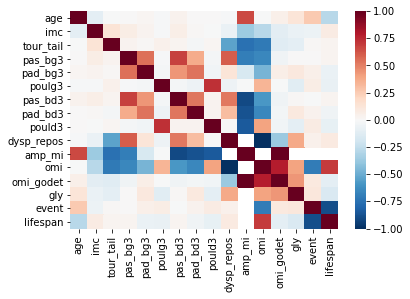

In [ ]:
# Pearson Correlation calculation
pearsoncorr = df_all_result.corr(method='pearson')
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r')

In [ ]:
# Person table

pearsoncorr

,age,poids,tail,tour_tail,pas_bg3,pad_bg3,poulg3,pas_bd3,pad_bd3,pould3,dysp_repos,amp_mi,omi,omi_godet,gly,event,lifespan
age,1.000000,-0.139465,-0.008505,-0.004588,0.006329,0.017591,-0.009015,0.039534,0.002793,0.000713,-0.012034,0.661223,-0.000147,0.054734,0.130781,0.261757,-0.279298
poids,-0.139465,1.000000,0.020432,0.281045,0.131659,0.064836,0.015356,0.110813,0.026413,0.021143,-0.232938,-0.603804,-0.274249,-0.047533,-0.097632,-0.097516,0.132713
tail,-0.008505,0.020432,1.000000,-0.004284,-0.024889,-0.030289,0.003289,0.015145,-0.050975,0.002021,-0.260829,-0.383205,0.019112,-0.052296,-0.006044,-0.008250,0.009679
tour_tail,-0.004588,0.281045,-0.004284,1.000000,0.033993,0.011293,0.048417,0.026809,-0.023270,0.019827,-0.534272,-0.744458,-0.705318,-0.126043,-0.094496,0.011123,0.024491
pas_bg3,0.006329,0.131659,-0.024889,0.033993,1.000000,0.551913,-0.014319,0.680790,0.371068,-0.017205,0.606106,-0.692410,-0.650339,-0.049675,0.003280,0.003662,0.026225
pad_bg3,0.017591,0.064836,-0.030289,0.011293,0.551913,1.000000,-0.018317,0.440333,0.542786,-0.036877,0.128169,-0.162062,-0.463468,0.061958,0.108504,0.056233,-0.070087
poulg3,-0.009015,0.015356,0.003289,0.048417,-0.014319,-0.018317,1.000000,-0.022551,-0.051734,0.729665,-0.050593,-0.005996,0.338067,-0.006049,-0.109710,0.071684,-0.072490
pas_bd3,0.039534,0.110813,0.015145,0.026809,0.680790,0.440333,-0.022551,1.000000,0.536845,0.037659,0.524652,-0.900200,-0.582262,-0.045604,0.013078,-0.000631,0.028573
pad_bd3,0.002793,0.026413,-0.050975,-0.023270,0.371068,0.542786,-0.051734,0.536845,1.000000,0.032893,0.309785,-0.874912,-0.650766,-0.025289,0.093951,0.042515,-0.044790
pould3,0.000713,0.021143,0.002021,0.019827,-0.017205,-0.036877,0.729665,0.037659,0.032893,1.000000,0.001588,-0.838687,0.403451,-0.031124,-0.099252,0.079050,-0.083690


In [ ]:
# Set inf or NaN value to 0
df_all_result = df_all_result.replace([np.inf, -np.inf, np.nan], 0)

In [ ]:
#df_merge_19_15["event"] = df_merge_19_15["event"].map({'deces': 1, 'ICD': 2, 'AVC': 3, np.nan: 0})

df_all_result_death = df_all_result[df_all_result.event <= 1]
df_all_result_ICD = df_all_result[df_all_result['event'].isin([0,2])]
df_all_result_AVC = df_all_result[df_all_result['event'].isin([0,3])]

print("nb patient healthy + death: ", len(df_all_result_death))
print("nb patient healthy + ICD: ", len(df_all_result_ICD))
print("nb patient healthy + AVC: ", len(df_all_result_AVC))

nb patient healthy + death:  1498
nb patient healthy + ICD:  1446
nb patient healthy + AVC:  1443


# Feature selections




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

cols_X = list(df_all_result_death.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_death['event'].values
Y_events_new = df_all_result_death['event']
Y_lifespan= df_all_result_death['lifespan'].values

X_all = df_all_result_death[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_all_sm, Y_events_sm)
f_class_support = fit.get_support()
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_all_result_death.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
print("nb patient healthy + death: ", len(X_all_sm))


         Specs       Score
0          age  925.379004
1          imc  126.864599
4      pad_bg3  102.366553
8       pould3   38.450082
13         gly   32.898666
9   dysp_repos   31.236900
7      pad_bd3   30.159942
5       poulg3   28.558130
2    tour_tail   27.855181
10      amp_mi    4.653224
nb patient healthy + death:  2862


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
featureScores.nlargest(10,'Score')


,Specs,Score
0,age,925.379004
1,imc,126.864599
4,pad_bg3,102.366553
8,pould3,38.450082
13,gly,32.898666
9,dysp_repos,31.236900
7,pad_bd3,30.159942
5,poulg3,28.558130
2,tour_tail,27.855181
10,amp_mi,4.653224


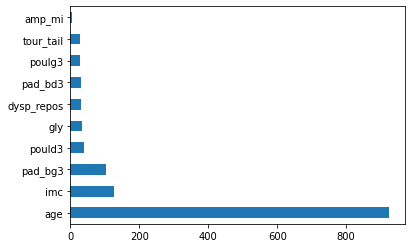

In [ ]:
import matplotlib.pyplot as plt
#model = ExtraTreesClassifier()
#model.fit(X_all_sm, Y_events_sm)
#etc_selector = SelectFromModel(estimator=ExtraTreesClassifier(), max_features=10)
#etc_selector.fit(X_all_sm, Y_events_sm)
#etc_support = etc_selector.get_support()
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
#df_all_result2 = df_all_result.copy()
#del df_all_result2
feat_importances = pd.Series(fit.scores_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

features_imp = list(feat_importances.nlargest(10).index)
score_results = []

for i in range(0, len(features_imp)):
  #print(features_imp)
  df_select_result_death = df_all_result_death[features_imp]
  Y_events_new = df_all_result_death['event']
  
  X_select = df_select_result_death.values
  sc = StandardScaler()
  X_select_std = sc.fit_transform(X_select)

  sm= SMOTE(random_state=0)
  X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

  # data sample
  skfold = KFold(n_splits=10, random_state=100)
  model_lr_skfold = RandomForestClassifier()
  results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  score_results.append(results_skfold.mean()*100.0)
  print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
  features_imp.pop(0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 93.47%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 91.58%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 90.15%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 90.67%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 86.41%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 84.38%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 85.88%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 80.68%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 66.94%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 3.22%


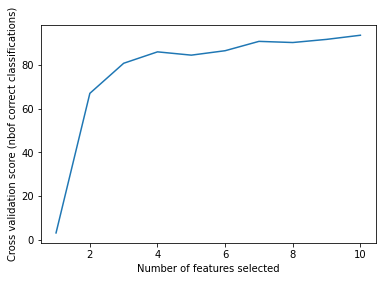

In [ ]:
# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(10,0,-1), score_results)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

cols_X = list(df_all_result_ICD.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_ICD['event'].values
Y_events_new = df_all_result_ICD['event']
Y_lifespan= df_all_result_ICD['lifespan'].values

X_all = df_all_result_ICD[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_all_sm, Y_events_sm)
f_class_support = fit.get_support()
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_all_result_ICD.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
print("nb patient healthy + ICD: ", len(X_all_sm))

        Specs        Score
0         age  1657.841889
12  omi_godet   248.211902
1         imc    72.217361
8      pould3    66.423096
5      poulg3    49.930425
13        gly    47.049432
2   tour_tail    24.116527
11        omi    10.888994
6     pas_bd3     6.620530
10     amp_mi     4.653224
nb patient healthy + ICD:  2862


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


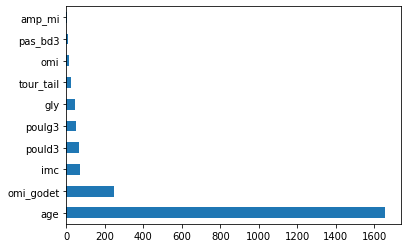

In [ ]:
feat_importances = pd.Series(fit.scores_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:


from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

features_imp = list(feat_importances.nlargest(10).index)
score_results = []

for i in range(0, len(features_imp)):
  #print(features_imp)
  df_select_result_ICD = df_all_result_ICD[features_imp]
  Y_events_new = df_all_result_ICD['event']
  
  X_select = df_select_result_ICD.values
  sc = StandardScaler()
  X_select_std = sc.fit_transform(X_select)

  sm= SMOTE(random_state=0)
  X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

  # data sample
  skfold = KFold(n_splits=10, random_state=100)
  model_lr_skfold = RandomForestClassifier()
  results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  score_results.append(results_skfold.mean()*100.0)
  print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
  features_imp.pop(0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 97.98%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 97.04%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 96.61%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 94.83%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 93.09%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 90.68%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 87.88%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 55.17%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 54.86%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 1.19%


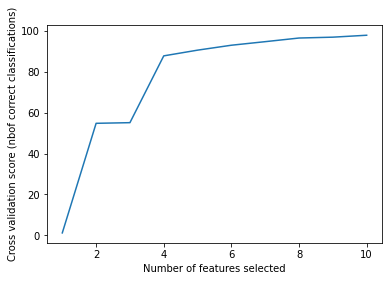

In [ ]:
# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(10,0,-1), score_results)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

cols_X = list(df_all_result_AVC.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_AVC['event'].values
Y_events_new = df_all_result_AVC['event']
Y_lifespan= df_all_result_AVC['lifespan'].values

X_all = df_all_result_AVC[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_all_sm, Y_events_sm)
f_class_support = fit.get_support()
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_all_result_AVC.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
print("nb patient healthy + AVC: ", len(df_all_result_AVC))

        Specs        Score
0         age  2167.883180
5      poulg3   119.498171
1         imc    86.977547
8      pould3    80.664862
2   tour_tail    72.598469
7     pad_bd3    32.297449
3     pas_bg3    28.756322
6     pas_bd3    25.629634
13        gly    17.930650
11        omi    10.888994
nb patient healthy + AVC:  1443


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


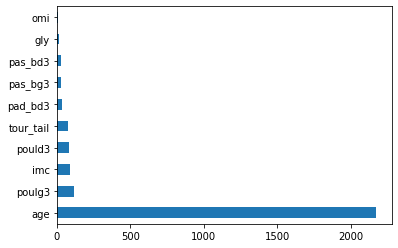

In [ ]:
feat_importances = pd.Series(fit.scores_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:


from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

features_imp = list(feat_importances.nlargest(10).index)
score_results = []

for i in range(0, len(features_imp)):
  #print(features_imp)
  df_select_result_AVC = df_all_result_AVC[features_imp]
  Y_events_new = df_all_result_AVC['event']
  
  X_select = df_select_result_AVC.values
  sc = StandardScaler()
  X_select_std = sc.fit_transform(X_select)

  sm= SMOTE(random_state=0)
  X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

  # data sample
  skfold = KFold(n_splits=10, random_state=100)
  model_lr_skfold = RandomForestClassifier()
  results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  score_results.append(results_skfold.mean()*100.0)
  print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
  features_imp.pop(0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 98.04%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 97.76%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 97.63%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 96.72%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 95.46%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 91.09%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 86.48%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 78.79%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 31.08%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 1.26%


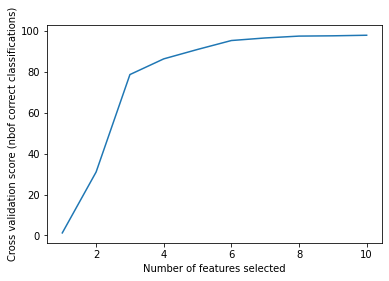

In [ ]:
# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(10,0,-1), score_results)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

cols_X = list(df_all_result_death.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_death['event'].values
Y_events_new = df_all_result_death['event']
Y_lifespan= df_all_result_death['lifespan'].values

X_all = df_all_result_death[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(X_all_sm, Y_events_sm)

df_all_result_death2 = df_all_result_death.copy()
del df_all_result_death2['event']
del df_all_result_death2['lifespan']
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = df_all_result_death2.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

9 selected features
['age', 'imc', 'tour_tail', 'pas_bg3', 'pad_bg3', 'poulg3', 'pas_bd3', 'pad_bd3', 'pould3']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[345 239 197 212 224 229 258 195 226   0   0   0 165 168]


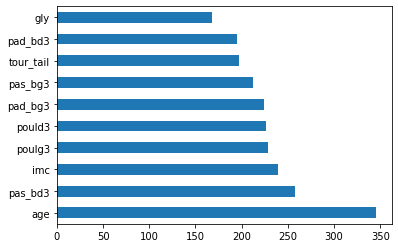

In [ ]:
#embeded_lgb_selector.scores_

#model = ExtraTreesClassifier()
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
lgbc.fit(X_all_sm, Y_events_sm)
#etc_selector = SelectFromModel(estimator=ExtraTreesClassifier(), max_features=10)
#etc_selector.fit(X_all_sm, Y_events_sm)
#etc_support = etc_selector.get_support()
print(lgbc.feature_importances_)
feat_importances = pd.Series(lgbc.feature_importances_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
feat_importances.nlargest(10)

age          345
pas_bd3      258
imc          239
poulg3       229
pould3       226
pad_bg3      224
pas_bg3      212
tour_tail    197
pad_bd3      195
gly          168
dtype: int64

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

features_imp = list(feat_importances.nlargest(10).index)
score_results = []

for i in range(0, len(features_imp)):
  #print(features_imp)
  df_select_result_death = df_all_result_death[features_imp]
  Y_events_new = df_all_result_death['event']
  
  X_select = df_select_result_death.values
  sc = StandardScaler()
  X_select_std = sc.fit_transform(X_select)

  sm= SMOTE(random_state=0)
  X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

  # data sample
  skfold = KFold(n_splits=10, random_state=100)
  model_lr_skfold = RandomForestClassifier()
  results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  score_results.append(results_skfold.mean()*100.0)
  print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
  features_imp.pop(0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 94.73%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 93.22%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 93.08%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 92.24%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 91.47%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 90.60%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 89.34%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 80.78%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 72.54%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 30.83%


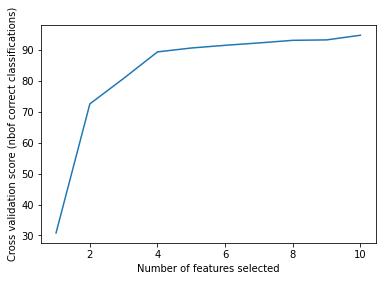

In [ ]:
# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(10,0,-1), score_results)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

cols_X = list(df_all_result_ICD.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_ICD['event'].values
Y_events_new = df_all_result_ICD['event']
Y_lifespan= df_all_result_ICD['lifespan'].values

X_all = df_all_result_ICD[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(X_all_sm, Y_events_sm)

df_all_result_ICD2 = df_all_result_ICD.copy()
del df_all_result_ICD2['event']
del df_all_result_ICD2['lifespan']
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = df_all_result_ICD2.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

9 selected features
['age', 'imc', 'tour_tail', 'pas_bg3', 'pad_bg3', 'poulg3', 'pas_bd3', 'pad_bd3', 'pould3']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[235 168 247 178 212 165 177 212 266   0   0   0 127  23]


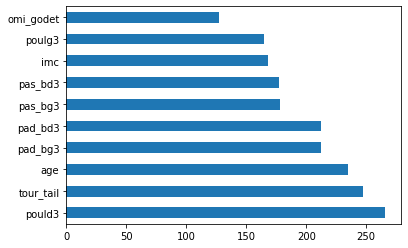

In [ ]:
#embeded_lgb_selector.scores_

#model = ExtraTreesClassifier()
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
lgbc.fit(X_all_sm, Y_events_sm)
#etc_selector = SelectFromModel(estimator=ExtraTreesClassifier(), max_features=10)
#etc_selector.fit(X_all_sm, Y_events_sm)
#etc_support = etc_selector.get_support()
print(lgbc.feature_importances_)
feat_importances = pd.Series(lgbc.feature_importances_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

features_imp = list(feat_importances.nlargest(10).index)
score_results = []

for i in range(0, len(features_imp)):
  #print(features_imp)
  df_select_result_ICD = df_all_result_ICD[features_imp]
  Y_events_new = df_all_result_ICD['event']
  
  X_select = df_select_result_ICD.values
  sc = StandardScaler()
  X_select_std = sc.fit_transform(X_select)

  sm= SMOTE(random_state=0)
  X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

  # data sample
  skfold = KFold(n_splits=10, random_state=100)
  model_lr_skfold = RandomForestClassifier()
  results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  score_results.append(results_skfold.mean()*100.0)
  print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
  features_imp.pop(0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 98.85%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 98.67%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 98.61%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 97.31%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 96.37%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 95.81%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 93.93%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 89.98%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 75.66%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 69.71%


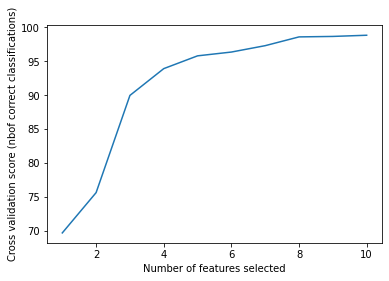

In [ ]:
# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(10,0,-1), score_results)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

cols_X = list(df_all_result_AVC.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_AVC['event'].values
Y_events_new = df_all_result_AVC['event']
Y_lifespan= df_all_result_AVC['lifespan'].values

X_all = df_all_result_AVC[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(X_all_sm, Y_events_sm)

df_all_result_AVC2 = df_all_result_AVC.copy()
del df_all_result_AVC2['event']
del df_all_result_AVC2['lifespan']
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = df_all_result_AVC2.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

7 selected features
['age', 'imc', 'tour_tail', 'pad_bg3', 'pad_bd3', 'pould3', 'omi_godet']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[125 160 210 111 159 105 112 145 231   0   0   0 181  75]


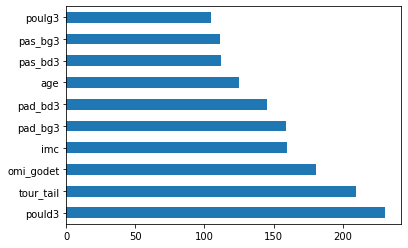

In [ ]:
#embeded_lgb_selector.scores_

#model = ExtraTreesClassifier()
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
lgbc.fit(X_all_sm, Y_events_sm)
#etc_selector = SelectFromModel(estimator=ExtraTreesClassifier(), max_features=10)
#etc_selector.fit(X_all_sm, Y_events_sm)
#etc_support = etc_selector.get_support()
print(lgbc.feature_importances_)
feat_importances = pd.Series(lgbc.feature_importances_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

features_imp = list(feat_importances.nlargest(10).index)
score_results = []

for i in range(0, len(features_imp)):
  #print(features_imp)
  df_select_result_AVC = df_all_result_AVC[features_imp]
  Y_events_new = df_all_result_AVC['event']
  
  X_select = df_select_result_AVC.values
  sc = StandardScaler()
  X_select_std = sc.fit_transform(X_select)

  sm= SMOTE(random_state=0)
  X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

  # data sample
  skfold = KFold(n_splits=10, random_state=100)
  model_lr_skfold = RandomForestClassifier()
  results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
  score_results.append(results_skfold.mean()*100.0)
  print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
  features_imp.pop(0)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 99.06%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 99.09%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 98.74%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 98.19%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 97.73%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 97.31%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 96.33%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 90.01%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 77.85%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 57.93%


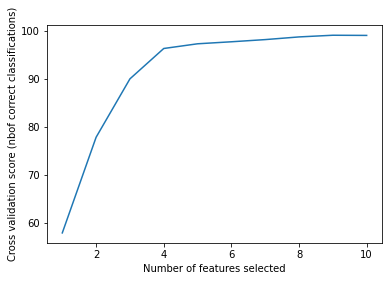

In [ ]:
# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(10,0,-1), score_results)
plt.show()

#############
# Miscelleanous

In [ ]:
df_select_result_death = df_all_result_death[[ 'age', 'imc', 'pad_bg3', 'pould3', 'gly', 'dysp_repos', 'pad_bd3', 'tour_tail', 'poulg3', 'amp_mi']]
df_select_result_death
#df_select_result = df_all_result[['poids', 'age', 'pad_bg3', 'pould3']]

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection


#Y_event = df_select_result_death['event'].values
Y_events_new = df_all_result_death['event']
#Y_lifespan= df_all_result['lifespan'].values

X_select = df_select_result_death.values
sc = StandardScaler()
X_select_std = sc.fit_transform(X_select)

sm= SMOTE(random_state=0)
X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

# data sample
skfold = KFold(n_splits=10, random_state=100)
model_lr_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 93.40%


Optimal number of features is  2
Feature importance: poids score:  1
Feature importance: age score:  1
Feature importance: pad_bg3 score:  2
Feature importance: pould3 score:  3
Feature importance: gly score:  7
Feature importance: dysp_repos score:  6
Feature importance: pad_bd3 score:  8
Feature importance: tour_tail score:  4
Feature importance: poulg3 score:  9
Feature importance: amp_mi score:  5
[1 1 2 3 7 6 8 4 9 5]
[ True  True False False False False False False False False]
Result after feature selection   0.9485861297539151


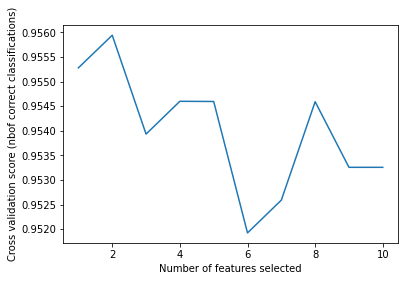

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt


kNN= KNeighborsClassifier(n_neighbors=1)
kNN= RandomForestClassifier()
estimator = linear_model.LogisticRegression()

# Use the RFECV algo in the data
selector = RFECV(estimator, cv=10)
selector.fit(X_select_std, Y_events_new)

# Print the optimal number of feature to be used for our ML model
nb_features = selector.n_features_
print ('Optimal number of features is ', nb_features)

for index in range(len(selector.ranking_)):
    print('Feature importance:', df_select_result_death.keys()[index], "score: ", selector.ranking_[index] )
# ranking of each feature
print (selector.ranking_)
print (selector.support_)


# Do a test : select only the recommended number of features ...
X_select_std2 = X_select_std[ : , selector.support_ ]

#... and do a cross vaidation
# using the k fold cross validation (here k=10)
scores = model_selection.cross_val_score(kNN, X_select_std2 , Y_events_new, cv=10)

print ('Result after feature selection  ',scores.mean())

# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

cols_X = list(df_all_result_ICD.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_ICD['event'].values
Y_events_new = df_all_result_ICD['event']
Y_lifespan= df_all_result_ICD['lifespan'].values

X_all = df_all_result_ICD[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_all_sm, Y_events_sm)
f_class_support = fit.get_support()
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_all_result_ICD.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
print("nb patient healthy + ICD: ", len(X_all_sm))

        Specs        Score
0         age  1648.897495
13  omi_godet   257.060360
1       poids   184.097957
9      pould3    62.265449
14        gly    47.003240
6      poulg3    44.766594
3   tour_tail    27.658186
12        omi    10.888994
7     pas_bd3     7.526963
5     pad_bg3     6.479962
nb patient healthy + ICD:  2862


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


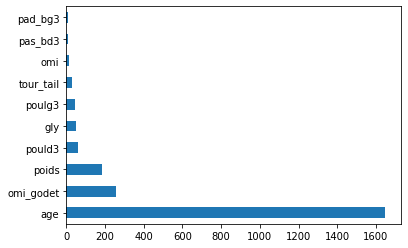

In [ ]:
feat_importances = pd.Series(fit.scores_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
df_select_result_ICD = df_all_result_ICD[['poids', 'age', 'pad_bg3', 'pould3','gly', 'omi_godet', 'pas_bd3', 'tour_tail', 'omi', 'poulg3']]
#df_select_result = df_all_result[['poids', 'age', 'pad_bg3', 'pould3']]

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection


#Y_event = df_select_result_death['event'].values
Y_events_new = df_all_result_ICD['event']
#Y_lifespan= df_all_result['lifespan'].values

X_select = df_select_result_ICD.values
sc = StandardScaler()
X_select_std = sc.fit_transform(X_select)

sm= SMOTE(random_state=0)
X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

# data sample
skfold = KFold(n_splits=10, random_state=100)
model_lr_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 98.57%


Optimal number of features is  1
Feature importance: poids score:  3
Feature importance: age score:  1
Feature importance: pad_bg3 score:  10
Feature importance: pould3 score:  4
Feature importance: gly score:  2
Feature importance: omi_godet score:  5
Feature importance: pas_bd3 score:  8
Feature importance: tour_tail score:  9
Feature importance: omi score:  6
Feature importance: poulg3 score:  7
[ 3  1 10  4  2  5  8  9  6  7]
[False  True False False False False False False False False]
Result after feature selection   0.9896360153256705


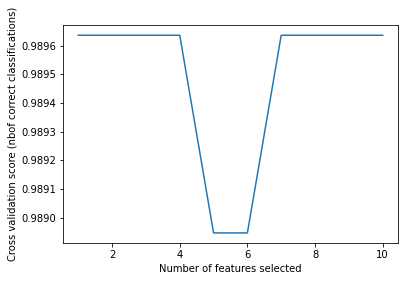

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt


kNN= KNeighborsClassifier(n_neighbors=1)
kNN= RandomForestClassifier()
estimator = linear_model.LogisticRegression()

# Use the RFECV algo in the data
selector = RFECV(estimator, cv=10)
selector.fit(X_select_std, Y_events_new)

# Print the optimal number of feature to be used for our ML model
nb_features = selector.n_features_
print ('Optimal number of features is ', nb_features)

for index in range(len(selector.ranking_)):
    print('Feature importance:', df_select_result_ICD.keys()[index], "score: ", selector.ranking_[index] )
# ranking of each feature
print (selector.ranking_)
print (selector.support_)


# Do a test : select only the recommended number of features ...
X_select_std2 = X_select_std[ : , selector.support_ ]

#... and do a cross vaidation
# using the k fold cross validation (here k=10)
scores = model_selection.cross_val_score(kNN, X_select_std2 , Y_events_new, cv=10)

print ('Result after feature selection  ',scores.mean())

# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

cols_X = list(df_all_result_AVC.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_AVC['event'].values
Y_events_new = df_all_result_AVC['event']
Y_lifespan= df_all_result_AVC['lifespan'].values

X_all = df_all_result_AVC[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_all_sm, Y_events_sm)
f_class_support = fit.get_support()
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_all_result_AVC.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
print("nb patient healthy + AVC: ", len(df_all_result_AVC))

        Specs        Score
0         age  2167.335259
6      poulg3   119.431836
1       poids    97.040310
9      pould3    80.575171
3   tour_tail    72.574415
8     pad_bd3    32.212956
4     pas_bg3    28.745348
7     pas_bd3    25.509796
14        gly    17.931640
12        omi    10.888994
nb patient healthy + AVC:  1443


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


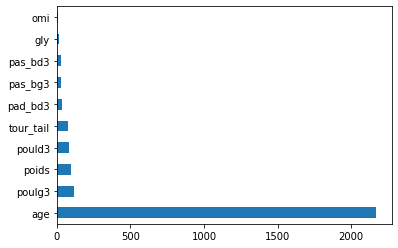

In [ ]:
feat_importances = pd.Series(fit.scores_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
df_select_result_AVC = df_all_result_AVC[['poids', 'age', 'poulg3', 'pould3', 'tour_tail', 'pad_bd3', 'pas_bg3', 'pas_bd3', 'gly', 'omi']]
#df_select_result = df_all_result[['poids', 'age', 'pad_bg3', 'pould3']]

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection


#Y_event = df_select_result_death['event'].values
Y_events_new = df_all_result_AVC['event']
#Y_lifespan= df_all_result['lifespan'].values

X_select = df_select_result_AVC.values
sc = StandardScaler()
X_select_std = sc.fit_transform(X_select)

sm= SMOTE(random_state=0)
X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

# data sample
skfold = KFold(n_splits=10, random_state=100)
model_lr_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 98.43%


Optimal number of features is  1
Feature importance: poids score:  7
Feature importance: age score:  1
Feature importance: poulg3 score:  2
Feature importance: pould3 score:  10
Feature importance: tour_tail score:  8
Feature importance: pad_bd3 score:  3
Feature importance: pas_bg3 score:  5
Feature importance: pas_bd3 score:  6
Feature importance: gly score:  9
Feature importance: omi score:  4
[ 7  1  2 10  8  3  5  6  9  4]
[False  True False False False False False False False False]
Result after feature selection   0.9916906130268199


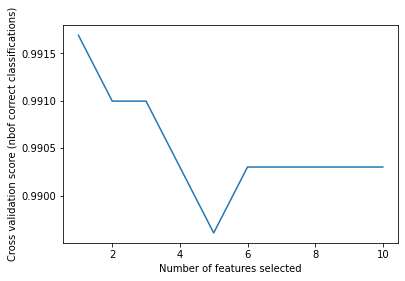

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt


kNN= KNeighborsClassifier(n_neighbors=1)
kNN= RandomForestClassifier()

estimator = linear_model.LogisticRegression()

# Use the RFECV algo in the data
selector = RFECV(estimator, cv=10)
selector.fit(X_select_std, Y_events_new)

# Print the optimal number of feature to be used for our ML model
nb_features = selector.n_features_
print ('Optimal number of features is ', nb_features)

for index in range(len(selector.ranking_)):
    print('Feature importance:', df_select_result_AVC.keys()[index], "score: ", selector.ranking_[index] )
# ranking of each feature
print (selector.ranking_)
print (selector.support_)


# Do a test : select only the recommended number of features ...
X_select_std2 = X_select_std[ : , selector.support_ ]

#... and do a cross vaidation
# using the k fold cross validation (here k=10)
scores = model_selection.cross_val_score(kNN, X_select_std2 , Y_events_new, cv=10)

print ('Result after feature selection  ',scores.mean())

# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

cols_X = list(df_all_result_death.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_death['event'].values
Y_events_new = df_all_result_death['event']
Y_lifespan= df_all_result_death['lifespan'].values

X_all = df_all_result_death[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(X_all_sm, Y_events_sm)

df_all_result_death2 = df_all_result_death.copy()
del df_all_result_death2['event']
del df_all_result_death2['lifespan']
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = df_all_result_death2.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

10 selected features
['age', 'poids', 'tail', 'tour_tail', 'pas_bg3', 'pad_bg3', 'pas_bd3', 'pad_bd3', 'pould3', 'omi_godet']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[260 199 272 198 164 189 162 225 183 197   0   0   0 175 152]


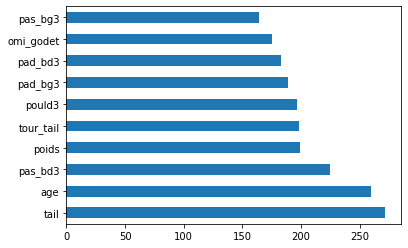

In [ ]:
 #embeded_lgb_selector.scores_

#model = ExtraTreesClassifier()
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
lgbc.fit(X_all_sm, Y_events_sm)
#etc_selector = SelectFromModel(estimator=ExtraTreesClassifier(), max_features=10)
#etc_selector.fit(X_all_sm, Y_events_sm)
#etc_support = etc_selector.get_support()
print(lgbc.feature_importances_)
feat_importances = pd.Series(lgbc.feature_importances_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
df_select_result_death = df_all_result_death[['age', 'poids', 'tail', 'tour_tail', 'pas_bg3', 'pad_bg3', 'pas_bd3', 'pad_bd3', 'pould3', 'omi_godet']]
df_select_result_death
#df_select_result = df_all_result[['poids', 'age', 'pad_bg3', 'pould3']]

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection


#Y_event = df_select_result_death['event'].values
Y_events_new = df_all_result_death['event']
#Y_lifespan= df_all_result['lifespan'].values

X_select = df_select_result_death.values
sc = StandardScaler()
X_select_std = sc.fit_transform(X_select)

sm= SMOTE(random_state=0)
X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

# data sample
skfold = KFold(n_splits=10, random_state=100)
model_lr_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 94.72%


Optimal number of features is  6
Feature importance: age score:  1
Feature importance: poids score:  1
Feature importance: tail score:  5
Feature importance: tour_tail score:  1
Feature importance: pas_bg3 score:  1
Feature importance: pad_bg3 score:  1
Feature importance: pas_bd3 score:  4
Feature importance: pad_bd3 score:  2
Feature importance: pould3 score:  1
Feature importance: omi_godet score:  3
[1 1 5 1 1 1 4 2 1 3]
[ True  True False  True  True  True False False  True False]
Result after feature selection   0.953923937360179


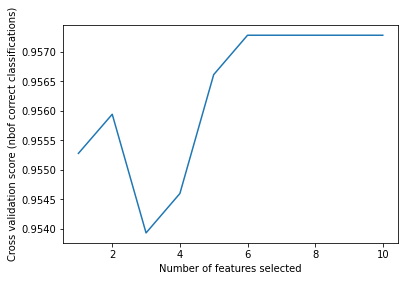

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt


kNN= KNeighborsClassifier(n_neighbors=1)
kNN= RandomForestClassifier()
estimator = linear_model.LogisticRegression()

# Use the RFECV algo in the data
selector = RFECV(estimator, cv=10)
selector.fit(X_select_std, Y_events_new)

# Print the optimal number of feature to be used for our ML model
nb_features = selector.n_features_
print ('Optimal number of features is ', nb_features)

for index in range(len(selector.ranking_)):
    print('Feature importance:', df_select_result_death.keys()[index], "score: ", selector.ranking_[index] )
# ranking of each feature
print (selector.ranking_)
print (selector.support_)


# Do a test : select only the recommended number of features ...
X_select_std2 = X_select_std[ : , selector.support_ ]

#... and do a cross vaidation
# using the k fold cross validation (here k=10)
scores = model_selection.cross_val_score(kNN, X_select_std2 , Y_events_new, cv=10)

print ('Result after feature selection  ',scores.mean())

# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

cols_X = list(df_all_result_ICD.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_ICD['event'].values
Y_events_new = df_all_result_ICD['event']
Y_lifespan= df_all_result_ICD['lifespan'].values

X_all = df_all_result_ICD[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(X_all_sm, Y_events_sm)

df_all_result_ICD2 = df_all_result_ICD.copy()
del df_all_result_ICD2['event']
del df_all_result_ICD2['lifespan']
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = df_all_result_ICD2.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

10 selected features
['age', 'poids', 'tail', 'tour_tail', 'pas_bg3', 'pad_bg3', 'poulg3', 'pas_bd3', 'pad_bd3', 'pould3']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[254 198 166 193 162 195 157 178 192 157   0   0   0 123  36]


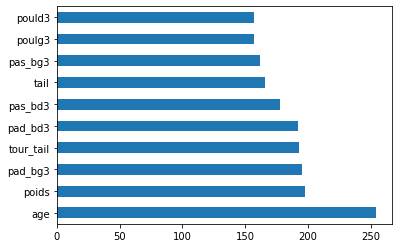

In [ ]:
 #embeded_lgb_selector.scores_

#model = ExtraTreesClassifier()
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
lgbc.fit(X_all_sm, Y_events_sm)
#etc_selector = SelectFromModel(estimator=ExtraTreesClassifier(), max_features=10)
#etc_selector.fit(X_all_sm, Y_events_sm)
#etc_support = etc_selector.get_support()
print(lgbc.feature_importances_)
feat_importances = pd.Series(lgbc.feature_importances_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
df_select_result_ICD = df_all_result_ICD[['age', 'poids', 'tail', 'tour_tail', 'pas_bg3', 'pad_bg3', 'poulg3', 'pas_bd3', 'pad_bd3', 'pould3']]
#df_select_result = df_all_result[['poids', 'age', 'pad_bg3', 'pould3']]

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection


#Y_event = df_select_result_death['event'].values
Y_events_new = df_all_result_ICD['event']
#Y_lifespan= df_all_result['lifespan'].values

X_select = df_select_result_ICD.values
sc = StandardScaler()
X_select_std = sc.fit_transform(X_select)

sm= SMOTE(random_state=0)
X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

# data sample
skfold = KFold(n_splits=10, random_state=100)
model_lr_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 98.22%


Optimal number of features is  1
Feature importance: age score:  1
Feature importance: poids score:  2
Feature importance: tail score:  8
Feature importance: tour_tail score:  10
Feature importance: pas_bg3 score:  4
Feature importance: pad_bg3 score:  9
Feature importance: poulg3 score:  7
Feature importance: pas_bd3 score:  5
Feature importance: pad_bd3 score:  6
Feature importance: pould3 score:  3
[ 1  2  8 10  4  9  7  5  6  3]
[ True False False False False False False False False False]
Result after feature selection   0.9896360153256705


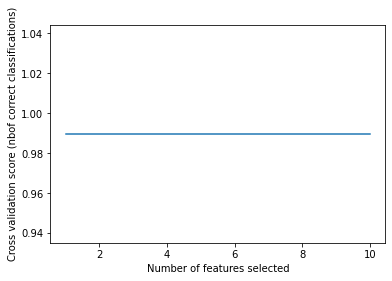

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt


kNN= KNeighborsClassifier(n_neighbors=1)
kNN= RandomForestClassifier()
estimator = linear_model.LogisticRegression()

# Use the RFECV algo in the data
selector = RFECV(estimator, cv=10)
selector.fit(X_select_std, Y_events_new)

# Print the optimal number of feature to be used for our ML model
nb_features = selector.n_features_
print ('Optimal number of features is ', nb_features)

for index in range(len(selector.ranking_)):
    print('Feature importance:', df_select_result_ICD.keys()[index], "score: ", selector.ranking_[index] )
# ranking of each feature
print (selector.ranking_)
print (selector.support_)


# Do a test : select only the recommended number of features ...
X_select_std2 = X_select_std[ : , selector.support_ ]

#... and do a cross vaidation
# using the k fold cross validation (here k=10)
scores = model_selection.cross_val_score(kNN, X_select_std2 , Y_events_new, cv=10)

print ('Result after feature selection  ',scores.mean())

# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

cols_X = list(df_all_result_AVC.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result_AVC['event'].values
Y_events_new = df_all_result_AVC['event']
Y_lifespan= df_all_result_AVC['lifespan'].values

X_all = df_all_result_AVC[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(X_all_sm, Y_events_sm)

df_all_result_AVC2 = df_all_result_AVC.copy()
del df_all_result_AVC2['event']
del df_all_result_AVC2['lifespan']
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = df_all_result_AVC2.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

9 selected features
['age', 'poids', 'tail', 'tour_tail', 'pad_bg3', 'pas_bd3', 'pad_bd3', 'pould3', 'omi_godet']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[160 136 124 152 102 146  89 130 153 104   0   0   0 159 100]


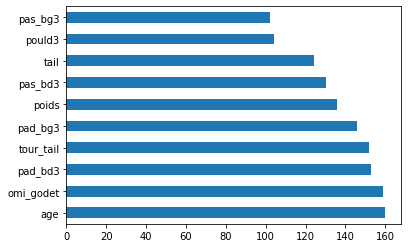

In [ ]:
 #embeded_lgb_selector.scores_

#model = ExtraTreesClassifier()
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
lgbc.fit(X_all_sm, Y_events_sm)
#etc_selector = SelectFromModel(estimator=ExtraTreesClassifier(), max_features=10)
#etc_selector.fit(X_all_sm, Y_events_sm)
#etc_support = etc_selector.get_support()
print(lgbc.feature_importances_)
feat_importances = pd.Series(lgbc.feature_importances_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
df_select_result_AVC = df_all_result_AVC[['age', 'poids', 'tail', 'tour_tail', 'pad_bg3', 'pas_bd3', 'pad_bd3', 'pould3', 'omi_godet']]
#df_select_result = df_all_result[['poids', 'age', 'pad_bg3', 'pould3']]

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection


#Y_event = df_select_result_death['event'].values
Y_events_new = df_all_result_AVC['event']
#Y_lifespan= df_all_result['lifespan'].values

X_select = df_select_result_AVC.values
sc = StandardScaler()
X_select_std = sc.fit_transform(X_select)

sm= SMOTE(random_state=0)
X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

# data sample
skfold = KFold(n_splits=10, random_state=100)
model_lr_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 99.20%


Optimal number of features is  1
Feature importance: age score:  1
Feature importance: poids score:  6
Feature importance: tail score:  8
Feature importance: tour_tail score:  7
Feature importance: pad_bg3 score:  5
Feature importance: pas_bd3 score:  9
Feature importance: pad_bd3 score:  2
Feature importance: pould3 score:  4
Feature importance: omi_godet score:  3
[1 6 8 7 5 9 2 4 3]
[ True False False False False False False False False]
Result after feature selection   0.9916906130268199


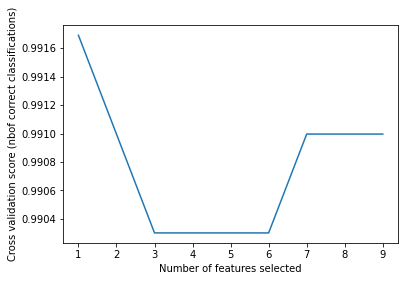

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt


kNN= KNeighborsClassifier(n_neighbors=1)
kNN= RandomForestClassifier()
estimator = linear_model.LogisticRegression()

# Use the RFECV algo in the data
selector = RFECV(estimator, cv=10)
selector.fit(X_select_std, Y_events_new)

# Print the optimal number of feature to be used for our ML model
nb_features = selector.n_features_
print ('Optimal number of features is ', nb_features)

for index in range(len(selector.ranking_)):
    print('Feature importance:', df_select_result_AVC.keys()[index], "score: ", selector.ranking_[index] )
# ranking of each feature
print (selector.ranking_)
print (selector.support_)


# Do a test : select only the recommended number of features ...
X_select_std2 = X_select_std[ : , selector.support_ ]

#... and do a cross vaidation
# using the k fold cross validation (here k=10)
scores = model_selection.cross_val_score(kNN, X_select_std2 , Y_events_new, cv=10)

print ('Result after feature selection  ',scores.mean())

# Prompt a graphic showing the score depending on the number of features selected
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nbof correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()


In [ ]:
df_all_result_death

,age,poids,tail,tour_tail,pas_bg3,pad_bg3,poulg3,pas_bd3,pad_bd3,pould3,dysp_repos,amp_mi,omi,omi_godet,gly,event,lifespan
10010101,39.0,0.001182,-0.000133,0.004255,-0.000443,0.002920,0.002026,-0.001403,0.001252,0.001637,0.0,0.0,0.0,-0.021277,0.000000,0.0,999.0
10010102,47.0,0.003868,-0.000250,0.000239,-0.002231,-0.004203,-0.006216,-0.000185,0.005404,-0.001850,0.0,0.0,0.0,-0.021277,0.000000,0.0,999.0
10010201,53.0,-0.002128,-0.000143,0.000000,-0.001824,0.001395,-0.000665,-0.001193,0.003246,-0.001954,0.0,0.0,0.0,-0.021277,0.000000,0.0,999.0
10060101,92.0,0.000443,-0.000268,0.003163,0.000000,0.009635,-0.003203,0.002081,0.009787,-0.002974,0.0,0.0,0.0,-0.021277,0.000000,0.0,999.0
10060401,71.0,-0.002503,0.000734,0.000000,-0.001478,0.004380,-0.001732,0.002461,0.004728,-0.003347,0.0,0.0,0.0,-0.021277,1.914894,0.0,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70690101,27.0,0.002500,0.001084,-0.002336,-0.002698,0.002404,0.000000,-0.006466,-0.004464,0.000000,0.0,0.0,0.0,0.000000,7.312500,0.0,999.0
70700102,25.0,-0.003151,0.001701,-0.002463,0.012338,0.021008,0.000000,-0.006236,0.022676,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,999.0
70820301,67.0,-0.003695,0.000000,-0.003925,-0.009217,-0.002187,0.000000,-0.008880,0.004373,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,999.0
80560101,27.0,-0.022774,0.000000,-0.010673,0.003827,0.017857,0.000000,0.002646,0.027569,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,14.0


[0.13682789 0.0366326  0.02613735 0.04747311 0.03667787 0.03596857
 0.02927976 0.03441291 0.03905699 0.03638017 0.04471991 0.04207388
 0.03116153 0.03649377 0.03260832 0.03350532 0.03320809 0.03698673
 0.03959841 0.0307039  0.03296544 0.01159575 0.00013984 0.00112549
 0.10113762 0.03312878]


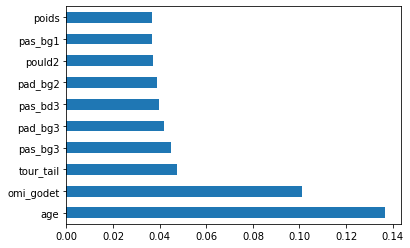

In [ ]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_all_sm, Y_events_sm)
etc_selector = SelectFromModel(estimator=ExtraTreesClassifier(), max_features=10)
etc_selector.fit(X_all_sm, Y_events_sm)
etc_support = etc_selector.get_support()
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
#df_all_result2 = df_all_result.copy()
#del df_all_result2
feat_importances = pd.Series(model.feature_importances_, index=cols_X)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
rfe_support

array([ True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False,  True,  True, False,  True, False, False, False])

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfe_selector = RFECV(estimator=LogisticRegression(max_iter=1000), min_features_to_select=4, step=10, verbose=5)
rfe_selector.fit(X_all_sm, Y_events_sm)
rfe_support = rfe_selector.get_support()
df_all_result2 = df_all_result.copy()
del df_all_result2['lifespan']
del df_all_result2['event']
rfe_feature = df_all_result2.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)
#dfscores = pd.DataFrame(rfe_selector.scores_)
#dfcolumns = pd.DataFrame(df_all_result.columns)
##concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))  #print 10 best features

Fitting estimator with 26 features.
Fitting estimator with 16 features.
Fitting estimator with 6 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
Fitting estimator with 6 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
Fitting estimator with 6 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
Fitting estimator with 6 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
Fitting estimator with 6 features.
26 selected features
['age', 'poids', 'tail', 'tour_tail', 'pas_bg1', 'pad_bg1', 'poulg1', 'pas_bg2', 'pad_bg2', 'poulg2', 'pas_bg3', 'pad_bg3', 'poulg3', 'pas_bd1', 'pad_bd2', 'pould1', 'pas_bd2', 'pould2', 'pas_bd3', 'pad_bd3', 'pould3', 'dysp_repos', 'amp_mi', 'omi', 'omi_godet', 'gly']


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), max_features=10)
embeded_lr_selector.fit(X_all_sm, Y_events_sm)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = df_all_result2.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

10 selected features
['age', 'pas_bg1', 'pad_bg1', 'poulg1', 'pad_bg2', 'pas_bg3', 'pad_bg3', 'pad_bd2', 'pad_bd3', 'gly']


In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=10)
embeded_rf_selector.fit(X_all_sm, Y_events_sm)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = df_all_result2.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

9 selected features
['age', 'poids', 'tour_tail', 'pas_bg3', 'pad_bg3', 'pad_bd2', 'pould2', 'omi_godet', 'gly']


In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(X_all_sm, Y_events_sm)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = df_all_result2.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

10 selected features
['age', 'poids', 'tail', 'tour_tail', 'pad_bg2', 'pad_bg3', 'pas_bd2', 'pould2', 'pas_bd3', 'omi_godet']


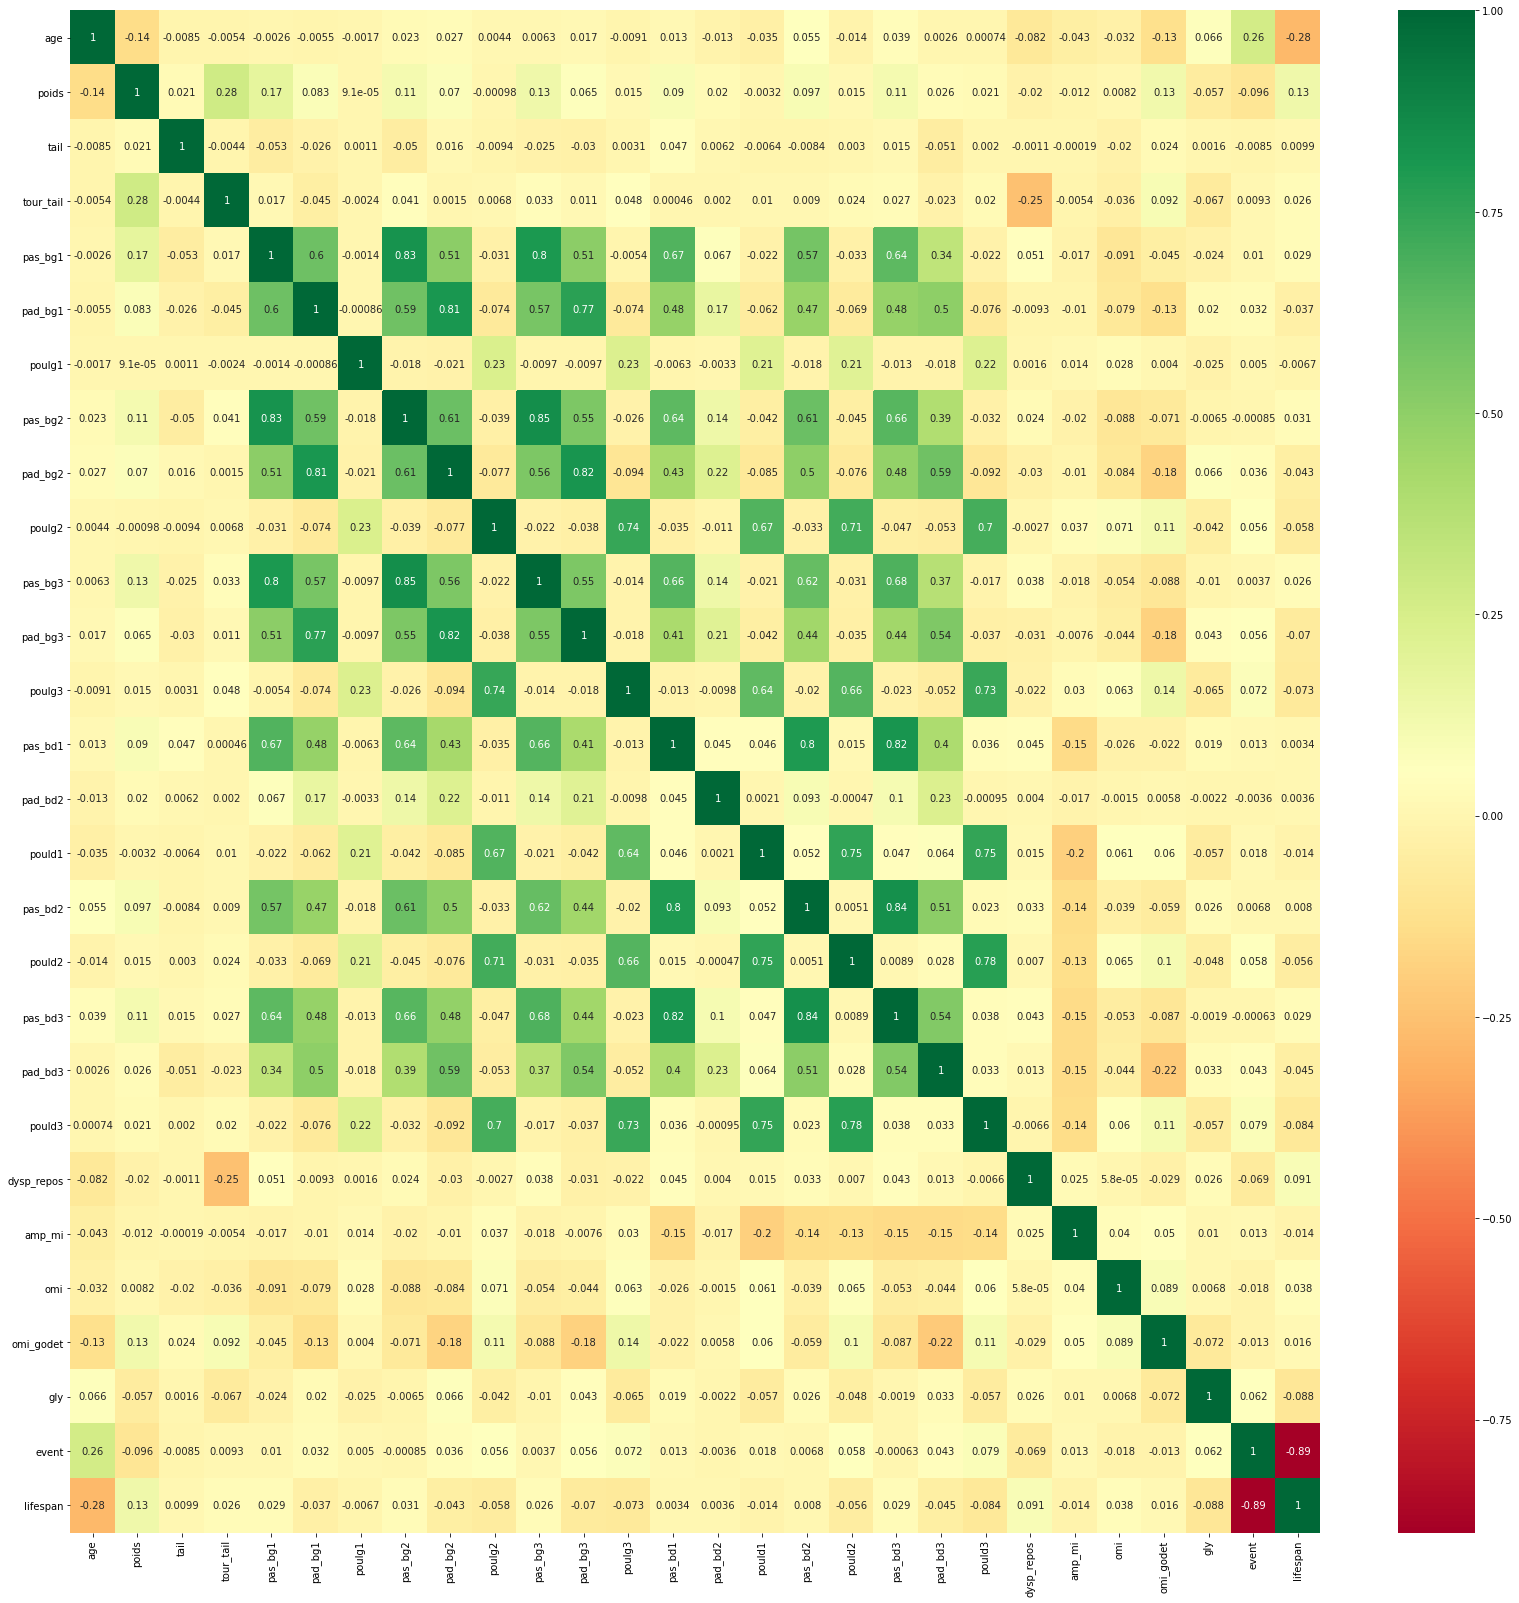

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = df_all_result.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(28,28))
#plot heat map
g=sns.heatmap(df_all_result[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# put all selection together
#feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
#                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
feature_selection_df = pd.DataFrame({'Feature':cols_X, 'f_class':f_class_support, 'extra Tree':etc_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(10)

,Feature,f_class,extra Tree,RFE,Logistics,Random Forest,LightGBM,Total
1,pad_bg3,True,True,True,True,True,True,6
2,age,True,True,True,True,True,True,6
3,tour_tail,True,True,True,False,True,True,5
4,omi_godet,True,True,True,False,True,True,5
5,pould2,True,False,True,False,True,True,4
6,poids,True,False,True,False,True,True,4
7,pas_bg3,False,True,True,True,True,False,4
8,pad_bg2,False,True,True,True,False,True,4
9,gly,True,False,True,True,True,False,4
10,pas_bg1,True,False,True,True,False,False,3


In [ ]:
df_select_result = df_all_result[['poids', 'age', 'pad_bg3', 'pould3','pad_bg2', 'pould2', 'pad_bd3', 'omi_godet', 'poulg2', 'pould1']]
df_select_result
df_select_result = df_all_result[['poids', 'age', 'pad_bg3', 'pould3']]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection


Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

X_select = df_select_result.values
sc = StandardScaler()
X_select_std = sc.fit_transform(X_select)

sm= SMOTE(random_state=0)
X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

# data sample
skfold = KFold(n_splits=10, random_state=100)
model_lr_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 90.92%


In [ ]:
# Report displaying the confusion matrix
# and also all the metrics: Accuracy, Recall, Precision, F1
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1265  166]
 [  85 1346]]
1265 166 85 1346
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1431
           1       0.89      0.94      0.91      1431

    accuracy                           0.91      2862
   macro avg       0.91      0.91      0.91      2862
weighted avg       0.91      0.91      0.91      2862



In [ ]:
df_select_result = df_all_result[['poids', 'age', 'pad_bg3', 'pould3']]

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#data = cross_validation.KFold(len(train_set), n_folds=10, indices=False) 

Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

X_select = df_select_result.values
sc = StandardScaler()
X_select_std = sc.fit_transform(X_select)

sm= SMOTE(random_state=0)
X_select_sm, Y_events_sm= sm.fit_sample(X_select_std, Y_events_new)

# data sample
skfold = KFold(n_splits=10, random_state=100)
model_lr_skfold = LogisticRegression(multi_class='auto', solver='liblinear')
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_select_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))




Accuracy: 69.05%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### PC Explained Variance for Selection of PC number

In [ ]:
from sklearn.preprocessing import StandardScaler

# Remove the dependant variable for prediction

cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

# Apply standardization to all values
X_all = df_all_result[cols_X].values
df_all_result = df_all_result[df_all_result.event <= 1]
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)

# Calculate eighen values and vectors
cov_mat = np.cov(X_all_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Compute explained variance and cumulative explained variance
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


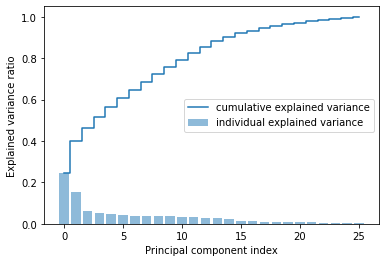

In [ ]:
import matplotlib.pyplot as plt

# plot explained variances
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,len(cum_var_exp)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

# PCA + Logistic Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

# cols_X datasets without labels (independant variable) 
cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

# Y_event datasets of labels
Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

# standardization of the values
X_all = df_all_result[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)

# Application of SMOTE technique to correct imbalanced classes
sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)


# intialize pca and logistic regression model
pca = PCA(n_components=16)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_all_pca = pca.fit_transform(X_all_sm)

# K-fold cross-validation application
skfold = StratifiedKFold(n_splits=10, random_state=100)
# Logistic Regression model applied for classification
model_lr_skfold = LogisticRegression(multi_class='auto', solver='liblinear')
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_all_pca, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_all_pca, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Accuracy: 74.99%


In [ ]:
# Report displaying the confusion matrix
# and also all the metrics: Accuracy, Recall, Precision, F1
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1078  353]
 [ 363 1068]]
1078 353 363 1068
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1431
           1       0.75      0.75      0.75      1431

    accuracy                           0.75      2862
   macro avg       0.75      0.75      0.75      2862
weighted avg       0.75      0.75      0.75      2862



# PCA + Random Tree Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

X_all = df_all_result[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

# intialize pca and logistic regression model
pca = PCA(n_components=16)

# fit and transform data
X_all_pca = pca.fit_transform(X_all_sm)

# data sample
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_rf_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_rf_skfold, X_all_pca, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_rf_skfold, X_all_pca, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 95.84%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1341   90]
 [  24 1407]]
1341 90 24 1407
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1431
           1       0.94      0.98      0.96      1431

    accuracy                           0.96      2862
   macro avg       0.96      0.96      0.96      2862
weighted avg       0.96      0.96      0.96      2862



# PCA + KNN

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

X_all = df_all_result[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)

sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

# intialize pca and logistic regression model
pca = PCA(n_components=16)

# fit and transform data
X_all_pca = pca.fit_transform(X_all_sm)

# data sample
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_rf_skfold = KNeighborsClassifier(n_neighbors=3)
results_skfold = model_selection.cross_val_score(model_rf_skfold, X_all_pca, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_rf_skfold, X_all_pca, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 94.30%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1280  151]
 [  12 1419]]
1280 151 12 1419
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1431
           1       0.90      0.99      0.95      1431

    accuracy                           0.94      2862
   macro avg       0.95      0.94      0.94      2862
weighted avg       0.95      0.94      0.94      2862



# TSNE + Logistic Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

X_all = df_all_result[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)

sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

tsne = TSNE(n_components=2)

# fit and transform data
X_all_tsne = tsne.fit_transform(X_all_sm)

# data sample
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_lr_skfold = LogisticRegression(multi_class='auto', solver='liblinear')
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_all_tsne, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_all_tsne, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 43.63%


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[513 918]
 [695 736]]
513 918 695 736
              precision    recall  f1-score   support

           0       0.42      0.36      0.39      1431
           1       0.44      0.51      0.48      1431

    accuracy                           0.44      2862
   macro avg       0.43      0.44      0.43      2862
weighted avg       0.43      0.44      0.43      2862



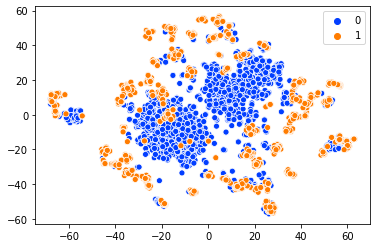

In [ ]:
import seaborn as sns
palette = sns.color_palette("bright", 2)
sns.scatterplot(X_all_tsne[:,0], X_all_tsne[:,1], hue=Y_events_sm, legend='full', palette=palette)

# TSNE + Random Tree Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

X_all = df_all_result[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)

sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

# intialize pca and logistic regression model
tsne = TSNE(n_components=2)

# fit and transform data
X_all_tsne = tsne.fit_transform(X_all_sm)

# data sample
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_lr_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_all_tsne, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_all_tsne, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 94.86%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1325  106]
 [  44 1387]]
1325 106 44 1387
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1431
           1       0.93      0.97      0.95      1431

    accuracy                           0.95      2862
   macro avg       0.95      0.95      0.95      2862
weighted avg       0.95      0.95      0.95      2862



# TSNE + KNN

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

X_all = df_all_result[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)

sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

# intialize pca and logistic regression model
tsne = TSNE(n_components=2)

# fit and transform data
X_all_tsne = tsne.fit_transform(X_all_sm)

# data sample
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_rf_skfold = KNeighborsClassifier(n_neighbors=3)
results_skfold = model_selection.cross_val_score(model_rf_skfold, X_all_tsne, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_rf_skfold, X_all_tsne, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 94.02%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1295  136]
 [  35 1396]]
1295 136 35 1396
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1431
           1       0.91      0.98      0.94      1431

    accuracy                           0.94      2862
   macro avg       0.94      0.94      0.94      2862
weighted avg       0.94      0.94      0.94      2862



# Autoencoder + Logistic Regression

Using TensorFlow backend.


Train on 2575 samples, validate on 287 samples
Epoch 1/200
2575/2575 [==============================] - 2s 670us/step - loss: -2.4014 - val_loss: -5.3981
Epoch 2/200
2575/2575 [==============================] - 0s 64us/step - loss: -4.2711 - val_loss: -5.9546
Epoch 3/200
2575/2575 [==============================] - 0s 56us/step - loss: -4.7728 - val_loss: -6.0123
Epoch 4/200
2575/2575 [==============================] - 0s 58us/step - loss: -5.1351 - val_loss: -6.8931
Epoch 5/200
2575/2575 [==============================] - 0s 60us/step - loss: -5.3928 - val_loss: -7.0424
Epoch 6/200
2575/2575 [==============================] - 0s 60us/step - loss: -5.4423 - val_loss: -6.0210
Epoch 7/200
2575/2575 [==============================] - 0s 58us/step - loss: -5.3446 - val_loss: -7.0671
Epoch 8/200
2575/2575 [==============================] - 0s 56us/step - loss: -5.4333 - val_loss: -7.0645
Epoch 9/200
2575/2575 [==============================] - 0s 59us/step - loss: -5.2101 - val_loss: -7.084

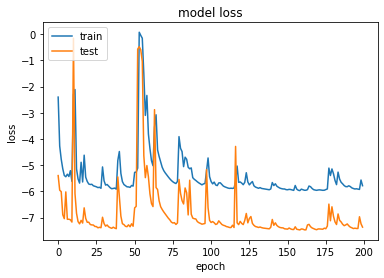

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D
from numpy import newaxis
X_all_sm1= X_all_sm[..., newaxis]


autoencoder = Sequential()
autoencoder.add(Conv1D(64,4,padding='same', activation='relu' ))
autoencoder.add(MaxPooling1D(pool_size=2))
autoencoder.add(Conv1D(128,4,padding='same', activation='relu'))
autoencoder.add(UpSampling1D(2))
autoencoder.add(Conv1D(64,4,padding='same', activation='relu'))
autoencoder.add(Conv1D(1,4,padding='same', activation='relu'))

# Compile model
autoencoder.compile(optimizer='Nadam', loss='binary_crossentropy', )

history = autoencoder.fit(X_all_sm1, X_all_sm1, epochs=200, batch_size=200, shuffle=True, validation_split=0.1)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
Y_events_sm1= Y_events_sm[..., newaxis]

X_all_sm2 = autoencoder.predict(X_all_sm1)

X_all_sm2 = X_all_sm2[:,:,0]

# data sample
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_lr_skfold = LogisticRegression(multi_class='auto', solver='liblinear')
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_all_sm2, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_all_sm2, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 75.02%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1137  294]
 [ 421 1010]]
1137 294 421 1010
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1431
           1       0.77      0.71      0.74      1431

    accuracy                           0.75      2862
   macro avg       0.75      0.75      0.75      2862
weighted avg       0.75      0.75      0.75      2862



# Autoencoder + Random Tree Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

X_all_sm2 = autoencoder.predict(X_all_sm1)

X_all_sm2 = X_all_sm2[:,:,0]

# intialize pca and logistic regression model
pca = PCA(n_components=16)

# fit and transform data
X_all_pca = pca.fit_transform(X_all_sm2)

# data sample
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_rf_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_rf_skfold, X_all_pca, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_rf_skfold, X_all_pca, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 90.99%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1277  154]
 [ 107 1324]]
1277 154 107 1324
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1431
           1       0.90      0.93      0.91      1431

    accuracy                           0.91      2862
   macro avg       0.91      0.91      0.91      2862
weighted avg       0.91      0.91      0.91      2862



# Autoencoder + KNN

In [ ]:
X_all_sm2 = autoencoder.predict(X_all_sm1)

X_all_sm2 = X_all_sm2[:,:,0]

# data sample
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_rf_skfold = KNeighborsClassifier(n_neighbors=3)
results_skfold = model_selection.cross_val_score(model_rf_skfold, X_all_sm2, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_rf_skfold, X_all_sm2, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 87.60%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1131  300]
 [  55 1376]]
1131 300 55 1376
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1431
           1       0.82      0.96      0.89      1431

    accuracy                           0.88      2862
   macro avg       0.89      0.88      0.88      2862
weighted avg       0.89      0.88      0.88      2862



# Raw + Logistic Regression

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#data = cross_validation.KFold(len(train_set), n_folds=10, indices=False) 

cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_events_new = df_all_result['event'].values
Y_lifespan= df_all_result['lifespan'].values

X_all = df_all_result[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)

sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all, Y_events_new)

# intialize pca and logistic regression model
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# data sample
skfold = KFold(n_splits=5, random_state=100)
model_lr_skfold = LogisticRegression(multi_class='auto', solver='liblinear')
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_all_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_all_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))



Accuracy: 59.58%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[891 540]
 [617 814]]
891 540 617 814
              precision    recall  f1-score   support

         0.0       0.59      0.62      0.61      1431
         1.0       0.60      0.57      0.58      1431

    accuracy                           0.60      2862
   macro avg       0.60      0.60      0.60      2862
weighted avg       0.60      0.60      0.60      2862



# Raw + Random Tree Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

X_all = df_all_result[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)

sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)

# data sample
skfold = KFold(n_splits=5, random_state=100)
model_lr_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_lr_skfold, X_all_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_lr_skfold, X_all_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 90.26%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1215  216]
 [  36 1395]]
1215 216 36 1395
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1431
           1       0.87      0.97      0.92      1431

    accuracy                           0.91      2862
   macro avg       0.92      0.91      0.91      2862
weighted avg       0.92      0.91      0.91      2862





```
# This is formatted as code
```

# Raw + KNN

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection

cols_X = list(df_all_result.columns.values)
cols_X.pop(cols_X.index('event'))
cols_X.pop(cols_X.index('lifespan'))

Y_event = df_all_result['event'].values
Y_events_new = df_all_result['event'].apply(lambda x: 1 if x>=1 else 0)
Y_lifespan= df_all_result['lifespan'].values

X_all = df_all_result[cols_X].values
sc = StandardScaler()
X_all_std = sc.fit_transform(X_all)


sm= SMOTE(random_state=0)
X_all_sm, Y_events_sm= sm.fit_sample(X_all_std, Y_events_new)


# data sample
skfold = KFold(n_splits=5)
model_rf_skfold = KNeighborsClassifier(n_neighbors=3)
results_skfold = model_selection.cross_val_score(model_rf_skfold, X_all_sm, Y_events_sm, cv=skfold)
predict_skfold = model_selection.cross_val_predict(model_rf_skfold, X_all_sm, Y_events_sm, cv=skfold) 
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 89.80%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_events_sm, predict_skfold))
tn, fp, fn, tp = confusion_matrix(Y_events_sm, predict_skfold).ravel()
print(tn, fp, fn, tp)

from sklearn.metrics import classification_report
report = classification_report(Y_events_sm, predict_skfold)
print(report)

[[1150  281]
 [  11 1420]]
1150 281 11 1420
              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1431
           1       0.83      0.99      0.91      1431

    accuracy                           0.90      2862
   macro avg       0.91      0.90      0.90      2862
weighted avg       0.91      0.90      0.90      2862



# MISCILEANOUS

In [ ]:
from sklearn.model_selection import train_test_split
# split into training and testing sets
#X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X_all_std, Y_events_new, test_size=0.1,
    stratify=Y_events_new, random_state=0
)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

#pca = PCA(n_components=18)
# intialize pca and logistic regression model
pca = PCA(n_components=16)
lr = LogisticRegression(multi_class='auto', solver='liblinear')
#lr = LinearRegression()

# fit and transform data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

model_pca = lr.fit(X_train_pca, y_train)

Text(0, 0.5, 'Predictions')

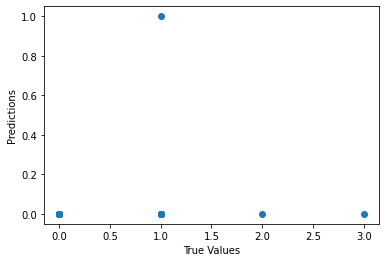

In [ ]:
predictions = lr.predict(X_test_pca)

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
from sklearn.metrics import confusion_matrix
print("Accuracy", model_pca.score(X_test_pca, y_test))
print("Confusion Matrix" )
confusion_matrix(y_test, predictions)

Accuracy 0.9477124183006536
Confusion Matrix


array([[144,   0,   0,   0],
       [  6,   1,   0,   0],
       [  1,   0,   0,   0],
       [  1,   0,   0,   0]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)

ValueError: ignored